## Figures shoreline evolution forecasting

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import project_path
from project_path import (
    module_path,
    configuration_dir, 
    data_dir, 
    report_dir,
    model_dir
)
from shorelineforecasting.utils.configs import GluonConfigs

### Load data

In [2]:
tf = GluonConfigs.load_data()
tf = tf.set_index('transect_id')
tf = tf.dropna(thresh=33)
print(f"Transects included in dataset: {tf.shape[0]}; timesteps: {tf.shape[1]}")
tf.head()

Transects included in dataset: 37111; timesteps: 33


1984       1985       1986      1987       1988  \
transect_id                                                            
BOX_051_151_15  677.32043  695.66370  713.29486  682.1743  688.23425   
BOX_051_151_18  768.93800  769.23883  762.44300  755.8622  761.79663   
BOX_051_151_21  711.41626  684.20540  695.49817  701.6695  705.29990   
BOX_051_151_30  795.81573  820.63700  799.72380  799.8664  823.56260   
BOX_051_151_32  242.70204  238.05159  229.93718  244.0620  247.68105   

                     1989       1990       1991       1992       1993  ...  \
transect_id                                                            ...   
BOX_051_151_15  672.13007  700.43286  693.43460  699.38560  687.97950  ...   
BOX_051_151_18  760.51710  763.30505  761.81360  769.22100  765.47060  ...   
BOX_051_151_21  703.61470  707.69403  692.90360  704.68280  704.99945  ...   
BOX_051_151_30  822.07300  823.56800  823.73300  824.58400  824.33360  ...   
BOX_051_151_32  257.49900  302.69217  301.27722  301.12033  316.40414  ...   

                    2007       2008       2009       2010       2011  \
transect_id                                                            
BOX_051_151_15  700.6640  712.41740  708.45123  740.33240  680.42510   
BOX_051_151_18  763.1057  759.72600  766.23150  770.77130  798.26830   
BOX_051_151_21  825.8698  820.51720  820.68680  842.18097  850.45460   
BOX_051_151_30  823.7820  823.15674  823.65790  821.31860  818.85803   
BOX_051_151_32  301.1231  313.63553  313.09814  312.90347  306.18658   

                     2012       2013       2014       2015       2016  
transect_id                                                            
BOX_051_151_15  758.35150  754.49695  763.04297  743.29680  779.41570  
BOX_051_151_18  797.99615  803.90950  797.90780  798.18830  803.68256  
BOX_051_151_21  775.96700  883.04240  867.92426  877.37415  874.50244  
BOX_051_151_30  817.31220  822.92970  818.73350  822.18480  818.73480  
BOX_051_151_32  294.18326  297.23654  302.88650  323.85840  304.36823  

[5 rows x 33 columns]

In [3]:
item_metrics = pd.read_csv(os.path.join(data_dir, "item-metrics.csv"))
item_metrics.groupby('predictor').mean()

MSE   abs_error  abs_target_sum  \
predictor                                                             
ARIMA                       2032.244147  119.923749      254.444294   
DeepAREstimator             1930.253426  122.958562      254.444294   
DeepStateEstimator          2059.614156  129.019802      254.444294   
ETS                         1997.539366  116.387965      254.444294   
MQCNNEstimator                      NaN  120.368131      254.444294   
SimpleFeedForwardEstimator  1817.349159  118.776681      254.444294   
SimpleLSTM                  1685.760859  132.753241      258.421863   
linregress                  2510.330038  140.089027      254.444294   

                            abs_target_mean  seasonal_error      MASE  \
predictor                                                               
ARIMA                             36.349185       13.435316  1.375208   
DeepAREstimator                   36.349185       13.435316  1.388775   
DeepStateEstimator                36.349185       13.435316  1.441471   
ETS                               36.349185       13.435316  1.345202   
MQCNNEstimator                    36.349185       13.435316  1.380416   
SimpleFeedForwardEstimator        36.349185       13.435316  1.358230   
SimpleLSTM                        36.917409       13.430902  1.657623   
linregress                        36.349185       13.435316  1.540923   

                                 MAPE     sMAPE  OWA       MSIS  ...  \
predictor                                                        ...   
ARIMA                       13.410326  0.877144  NaN  16.977724  ...   
DeepAREstimator              9.956959  0.833427  NaN  16.241198  ...   
DeepStateEstimator          12.751776  0.822450  NaN  18.554417  ...   
ETS                         11.883666  0.835794  NaN  16.559301  ...   
MQCNNEstimator              11.094521  0.821759  NaN        NaN  ...   
SimpleFeedForwardEstimator  11.447549  0.820460  NaN  17.148462  ...   
SimpleLSTM                  20.414388  0.919317  NaN        NaN  ...   
linregress                  14.021865  0.828920  NaN        NaN  ...   

                            QuantileLoss[0.6]  Coverage[0.6]  \
predictor                                                      
ARIMA                              121.775083       0.600823   
DeepAREstimator                    123.708696       0.572965   
DeepStateEstimator                 132.125393       0.635199   
ETS                                117.613103       0.598332   
MQCNNEstimator                     119.095454       0.576656   
SimpleFeedForwardEstimator         116.223539       0.570751   
SimpleLSTM                                NaN            NaN   
linregress                                NaN            NaN   

                            QuantileLoss[0.7]  Coverage[0.7]  \
predictor                                                      
ARIMA                              117.404225       0.692740   
DeepAREstimator                    118.209791       0.684233   
DeepStateEstimator                 128.428669       0.722947   
ETS                                112.791161       0.687928   
MQCNNEstimator                     112.432423       0.679283   
SimpleFeedForwardEstimator         109.412940       0.688929   
SimpleLSTM                                NaN            NaN   
linregress                                NaN            NaN   

                            QuantileLoss[0.8]  Coverage[0.8]  \
predictor                                                      
ARIMA                              104.193204       0.779623   
DeepAREstimator                    104.751543       0.788411   
DeepStateEstimator                 114.988846       0.797730   
ETS                                 99.493468       0.775334   
MQCNNEstimator                      99.077256       0.776589   
SimpleFeedForwardEstimator          96.973348       0.800748   
SimpleLSTM                                NaN            NaN   
linregress     

In [4]:
sites = pd.read_csv("/media/storage/data/shorelines/sites-gluonts-prepared-37k.csv")
sites = sites.loc[sites['transect_id'].isin(tf.index)]
print(f"Transects included in dataset: {sites.shape[0]}; metadata columns: {sites.shape[1]}")
sites.head()

Transects included in dataset: 37111; metadata columns: 27


transect_id country_id      continent country_name  changerate  \
0  BOX_051_170_3        ARG  South America    Argentina    0.389332   
1  BOX_051_170_4        ARG  South America    Argentina    0.501007   
2  BOX_051_170_5        ARG  South America    Argentina    0.831012   
3  BOX_051_170_6        ARG  South America    Argentina    1.471142   
4  BOX_051_170_7        ARG  South America    Argentina    2.159336   

   changerate_unc  flag_sandy  no_shorelines       RMSE  Timespan  ...  \
0        0.344834        True           33.0  18.281954      32.0  ...   
1        0.390176        True           33.0  20.685827      32.0  ...   
2        0.331491        True           33.0  17.574545      32.0  ...   
3        0.277497        True           33.0  14.711926      32.0  ...   
4        0.288062        True           33.0  15.272047      32.0  ...   

   Start_lat  Intersect_lon  Intersect_lat    End_lon    End_lat  \
0 -36.378387     -56.709120     -36.376892 -56.700333 -36.375397   
1 -36.374847     -56.710050     -36.373356 -56.701260 -36.371860   
2 -36.371933     -56.711193     -36.369860 -56.702587 -36.367786   
3 -36.368470     -56.712482     -36.366394 -56.703876 -36.364323   
4 -36.365000     -56.713768     -36.362930 -56.705162 -36.360855   

   coastline_idint                                       geometry  \
0             7427  POINT (-56.70912170410156 -36.37689208984375)   
1             7427  POINT (-56.71004867553711 -36.37335586547852)   
2             7427    POINT (-56.7111930847168 -36.3698616027832)   
3             7427  POINT (-56.71248245239258 -36.36639404296875)   
4             7427  POINT (-56.71376800537109 -36.36293029785156)   

   dbscan_cluster  fcluster  optics_clusters  
0               0      2455                0  
1               0      2455                0  
2               0      2455                0  
3               0      2455                0  
4               0      2455                0  

[5 rows x 27 columns]

In [5]:
from sklearn import preprocessing


transformations = {
    "standarize": preprocessing.StandardScaler(),
    "min-max-scale": preprocessing.MinMaxScaler()
}

rebase = lambda x: x-x[0]

def scale_df(df, method):
    x = df.values
    scaler = transformations[method]
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, index=df.index, columns=df.columns)

tf_t = tf.apply(rebase, axis=1)
tf_z = scale_df(tf_t.T, method='standarize').T


### Matplotlib Configurations

In [6]:
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import matplotlib as mpl

plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # for page wide figures

### Plot transects included in study

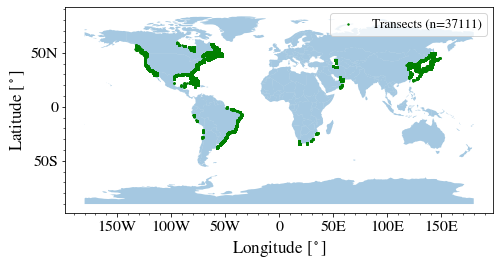

In [7]:
plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # for page wide figures

import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

def to_geodataframe(df: pd.DataFrame) -> gpd.GeoDataFrame:
    crs = CRS("epsg:4326")
    geometries = gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat)
    return gpd.GeoDataFrame(df, crs=crs, geometry=geometries)

def plot_transects(ax, gdf: gpd.GeoDataFrame):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))    
    world.plot(ax=ax, alpha=.4)
    gdf.plot(markersize=2, ax=ax, label=f"Transects (n={len(gdf)})", color='g')
    
    ax.set_xlabel('Longitude [$^\circ$]')
    ax.set_ylabel('Latitude [$^\circ$]')
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.set_xticklabels(['180W', '150W', '100W', '50W', '0', '50E', '100E', '150E', '180E'])
    ax.set_yticklabels(['90S', '50S', '0', '50N', '90N'])
    ax.legend(loc='upper right', frameon=True)
    
    return ax

# dataframe to geodataframe
geosites = to_geodataframe(sites)

# plot transects
fig, ax = plt.subplots()
plot_transects(ax, geosites)
# plt.savefig(os.path.join(report_dir, 'images/transects.pdf'), dpi=300)


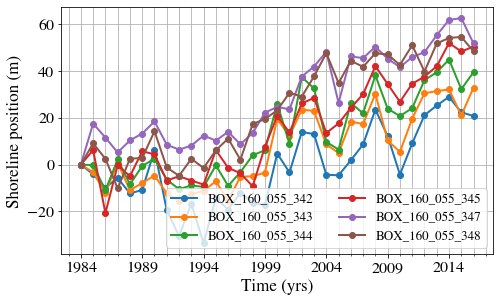

In [8]:
plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # for page wide figures

def plot_ts_transects(ax, transects, df):
    df = df[df.index.isin(transects)]
    df = df.T
    df.plot(ax=ax, style='-o')
    
#     ax.set_ylim([530, 700])
    ax.set_ylabel('Shoreline position (m)')
    ax.set_xlabel('Time (yrs)')
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.grid(which='both')
    ax.legend(bbox_to_anchor=(1.0, -0.0), loc='lower right', frameon=True, ncol=2)
    return ax

duck = [f'BOX_160_055_3{i}' for i in np.arange(42, 50, 1)]

fig, ax = plt.subplots()
plot_ts_transects(ax, duck, tf_t)
plt.tight_layout()
# plt.savefig(os.path.join(report_dir, 'images/time-series-example.pdf'), dpi=300)
plt.show()

In [9]:
from sklearn import preprocessing


def bin_df(df, nbins=1000):
    lb, ub = df.values.min(), df.values.max()
    bins = np.linspace(lb, ub, nbins)
    return df.apply(lambda x: pd.cut(x, bins).value_counts())


standarized_tf = scale_df(tf.T, method='standarize').T
min_max_tf = scale_df(tf.T, method='min-max-scale').T

standarized_tf_bins = bin_df(standarized_tf)
min_max_tf_bins = bin_df(min_max_tf)

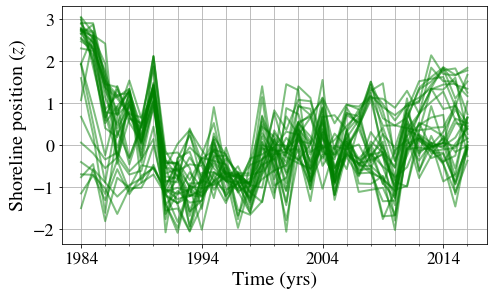

In [10]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

def get_cluster_tf(tf, transects, method):
    clusters = sites.loc[sites['transect_id'].isin(transects)][method].unique()
    cluster_transects = sites.loc[sites[method].isin(clusters)]['transect_id'].to_list()
    return tf.loc[tf.index.isin(cluster_transects)]

tf_duck_dbscan = get_cluster_tf(tf_t, duck, method='dbscan_cluster')
tf_duck_fcluster = get_cluster_tf(tf_t, duck, method='fcluster')

duck_dbscan_z = scale_df(tf_duck_dbscan.T, method='standarize').T
duck_fcluster_z = scale_df(tf_duck_fcluster.T, method='standarize').T


def plot_multiple_ts(ax, tf, ylabel='Shoreline position ($z$)', xlabel='Time (yrs)'):
    tf.plot(color='g', alpha=0.5, legend=False, ax=ax)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which="both")
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    return ax

fig, ax = plt.subplots()
plot_multiple_ts(ax, duck_dbscan_z.T)
# plt.savefig(os.path.join(report_dir, 'images/ts-duck-dbscan-z.pdf'), dpi=300)

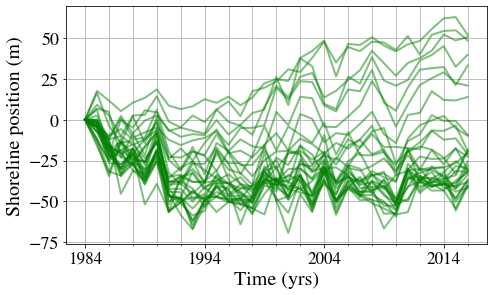

In [11]:
fig, ax = plt.subplots()
plot_multiple_ts(ax, tf_duck_dbscan.T, ylabel='Shoreline position (m)')
# plt.savefig(os.path.join(report_dir, 'images/ts-duck-dbscan.png'), dpi=300)

/media/storage/dev/shorelineforecasting/shorelineforecasting/venv/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


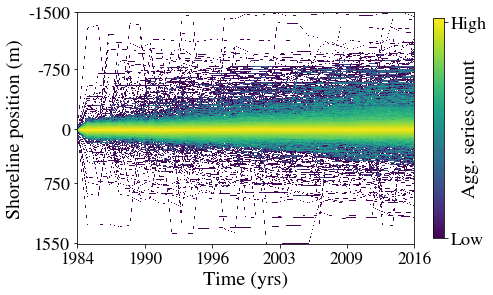

In [95]:
import datashader as ds
import datashader.transfer_functions as tfnc


def calc_extents(df):
    y_extent = (df.min().min(), df.max().max())
    x_extent = (int(df.columns.min()), int(df.columns.max()))
    return x_extent, y_extent


def scale_values_to_image_size(array: np.array, extent, range: int):
    """
    scales an Array to an Range
    :param array: is an 1-dimensional numpy array
    :param range: is the range [1:range]
    :return:
    """
    min = extent[0]
    max = extent[1]
    scale = np.vectorize(lambda v: ((v - min) / (max - min)) * (range - 1))
    return scale(array)


def convert_range(old_values, new_values, to_convert):
    old_min, old_max = min(old_values), max(old_values)
    new_min, new_max = min(new_values), max(new_values)
    old_range = (old_max - old_min)
    new_range = (new_max - new_min)
    f = lambda x: (((x - old_min) * new_range) / old_range) + new_min  
    return list(f(to_convert))


def plot_line_density(ax, tf, h=750, w=1000, xticks=6, yticks=None, 
                      xlabel='Time (yrs)', ylabel='Shoreline position (m)', 
                      ytick_labels=None, cbar_label='Agg. series count'):
    
    dt_range, sds_range = calc_extents(tf.T)
    df = pd.DataFrame(scale_values_to_image_size(tf.T.values, sds_range, range=h))
    
    # Each column is one data sample
    df = tf.reset_index(drop=True)

    # Append row with nan-values
    df = df.append(pd.DataFrame([np.array([np.nan] * len(df.columns))], columns=df.columns, index=[np.nan]))

    # Reshape
    x, y = df.shape
    arr = df.values.reshape((x * y, 1), order='F')
    df_reshaped = pd.DataFrame(arr, columns=list('y'), index=np.tile(df.index.values, y))
    df_reshaped = df_reshaped.reset_index()
    df_reshaped.columns.values[0] = 'x'

    # Create canvas
    x_range, y_range = calc_extents(df.T)
    cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)
    
    # Aggregate to heatmap
    aggs = cvs.line(df_reshaped, 'x', 'y', ds.count())
    heatmap_img = tfnc.Image(tfnc.shade(aggs, cmap=plt.cm.viridis))

    # plot, colorbar
    im = ax.imshow(heatmap_img.to_pil(), aspect='auto')
    cbar = fig.colorbar(im, fraction=0.03, pad=0.05, ticks=[0, 250], ax=ax)
    cbar.ax.set_yticklabels(['Low', 'High'])
    cbar.set_label(cbar_label, labelpad=-25)

    # ticks
    if yticks is None:
        yticks = [min(sds_range), 0, max(sds_range)]
    
    ax.set_xticks(np.linspace(0, w, xticks))
    ax.set_yticks(convert_range(
        old_values=sds_range,
        new_values=[h, 0],
        to_convert=yticks
    ))
    
    ax.set_xticklabels(
        pd.date_range(
            start=f'{dt_range[0]}-01-01',
            end=f'{dt_range[1]}-01-01',
            periods=33/(xticks-1)
        ).strftime('%Y')
    )
    
    if ytick_labels is None:
        ax.set_yticklabels(
            np.flip(yticks).astype(int)
        )
    else:
        ax.set_yticklabels(ytick_labels)
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)   
    return ax   


plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))


fig, ax = plt.subplots()    
plot_line_density(ax, tf_t.T, yticks=[-1500, -750, 46, 750, 1550], 
                 ytick_labels=[-1500, -750, 0, 750, 1550])
# plt.savefig(os.path.join(report_dir, 'images/time-series.png'), dpi=300)
plt.show()

/media/storage/dev/shorelineforecasting/shorelineforecasting/venv/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


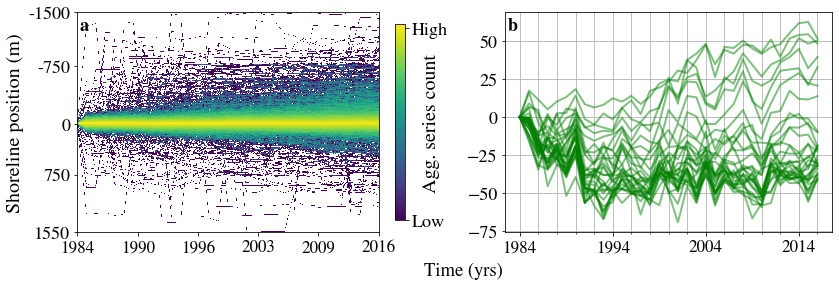

In [232]:
import string 


fig, axes = plt.subplots(1, 2, figsize=(12,4))

plot_line_density(axes[0], tf_t.T, yticks=[-1500, -750, 46, 750, 1550], 
                 ytick_labels=[-1500, -750, 0, 750, 1550], xlabel='')
plot_multiple_ts(axes[1], tf_duck_dbscan.T, xlabel='', ylabel='')

for i, ax in enumerate(axes):
    ax.text(0.008, 0.92, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')


fig.text(0.55, 0., 'Time (yrs)', ha='center', fontsize=18.5)
# plt.savefig(os.path.join(report_dir, 'images/time-series.pdf'), dpi=300, bbox_inches='tight')   t 
    


In [14]:
def percentage_p1_smaller_than_p2(df, predictor1, predictor2, statistic, return_transects=False):
    s1 = df.loc[df['predictor']==predictor1][['item_id', statistic]]
    s2 = df.loc[df['predictor']==predictor2][['item_id', statistic]]
    [i.set_index('item_id', inplace=True) for i in [s1, s2]]
    if return_transects is True:
        return s1[(s1<s2).values==True]
    return (s1 < s2).mean()

z = percentage_p1_smaller_than_p2(item_metrics, 'linregress', 'SimpleFeedForwardEstimator', 'MSE', return_transects=True)



# item_metrics.loc[item_metrics['predictor']=='linregress']['MSE']

In [15]:
res = []

for i in ['SimpleFeedForwardEstimator', 'DeepAREstimator', 'DeepStateEstimator']:
    res.append(percentage_p1_smaller_than_p2(item_metrics, i, 'linregress', 'MSE', return_transects=False).values)
np.mean(res)

0.5379716705738639

### Worst forecasts

In [16]:
target = {
    "largest": lambda df, n: df[filter_metric].nlargest(n).index,
    "smallest": lambda df, n: df[filter_metric].nsmallest(n).index
}
filter_metric = "MASE"
target["largest"](item_metrics, 1000)
    

def plot_nlargest_series(tf, metrics, n, sample_size):
    nlarge = metrics['MASE'].nlargest(n)
    nlarge = np.random.choice(nlarge.index, size=sample_size)
    for i in nlarge:
        idx = metrics.iloc[i]['item_id']
        tf.loc[idx].plot()


def get_nlargest_tf(tf, metrics, filter_metric, npercent=0.05, pred_grouped=False, unique=True):
    if pred_grouped is True:
        transects = list()
        for gr, df in metrics.groupby('predictor'):
            n = int(len(df)*npercent)
            df = df.reset_index(drop=True)
            idx = df[filter_metric].nlargest(n).index
            transects.append(df.iloc[idx]['item_id'].to_list())
    else:
        nlarge = metrics[filter_metric].nlargest(int(len(metrics)*npercent))
        transects = metrics.iloc[nlarge.index]['item_id'].to_list()
    if unique is True: 
        return tf.loc[np.unique(transects)]
    return tf.loc[transects]




### Plot worst forecasts

/media/storage/dev/shorelineforecasting/shorelineforecasting/venv/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


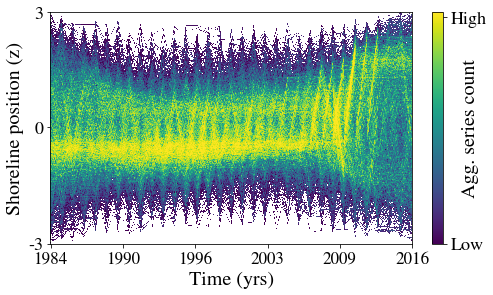

In [17]:
worst_fcst_tf = get_nlargest_tf(tf_t, item_metrics, filter_metric='MSE', npercent=0.05, pred_grouped=False, unique=False)

plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

fig, ax = plt.subplots()
plot_line_density(ax, scale_df(worst_fcst_tf.T, 'standarize'), ylabel='Shoreline position (z)')
# plt.savefig(os.path.join(report_dir, 'images/time-series-worst-predictions-mse.pdf'), dpi=300)

### Plot data partitions

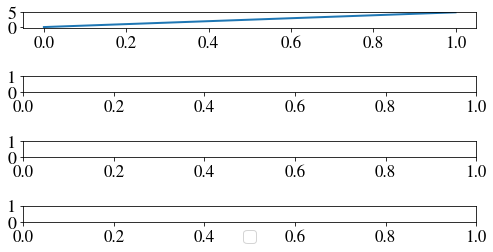

In [125]:
fig, axes = plt.subplots(nrows=4)
axes[0].plot(np.linspace(0, 1, 10), np.linspace(0, 5, 10))

fig.subplots_adjust(top=0.8, left=0.1, right=0.9, bottom=0.2)  # create some spa
handles, labels = axes[0].get_legend_handles_labels()
axes[-1].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -1.8))

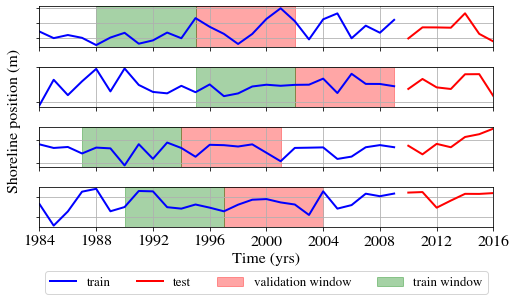

In [227]:
import matplotlib.dates as mdates

plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # half page width 

def plot_ts_split(ax, ts, prediction_length, context_length=None):
    
    if context_length is None:
        context_length = 2*prediction_length
        
    upper_bound = np.random.randint(
        low=context_length + prediction_length,
        high=len(ts) - prediction_length,
        size=1
    )
       
    dates = pd.date_range(start=ts.index[0], freq="AS", periods=len(ts))
    ax.plot(dates[:-prediction_length], ts[:-prediction_length].values, color='b', label='train')
    ax.plot(dates[-prediction_length:], ts[-prediction_length:].values, color='r', label='test')
    
    ax.set_xlim([dates[0], dates[-1]])
    ax.tick_params(labelleft=False)        
    ax.xaxis.set_major_locator(mdates.YearLocator(4)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.grid(which="both")
    
    ax.axvspan(
        dates[upper_bound-prediction_length], 
        dates[upper_bound], 
        alpha=0.35, 
        color='red', 
        label='validation window'
    )
    ax.axvspan(
        dates[upper_bound-prediction_length-context_length], 
        dates[upper_bound-prediction_length], 
        alpha=0.35, 
        color='green', 
        label='train window'
    )
    
    return ax

nseries = 4
transects = tf.sample(nseries).index

fig, axes = plt.subplots(nrows=nseries, sharex=True)
for ax, transect in zip(axes.flatten(), transects):    
    plot_ts_split(
        ax=ax,
        ts=tf.loc[transect],
        prediction_length=7,
        context_length=7
    )
    
handles, labels = ax.get_legend_handles_labels()
fig.subplots_adjust(top=0.8, left=0.1, right=0.9, bottom=0.2)  # create some space below the plots by increasing the bottom-value
axes[-1].legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -1.8))
fig.text(0.5, 0.15, 'Time (yrs)', ha='center', fontsize=16)
fig.text(0., 0.6, 'Shoreline position (m) ', va='center', rotation='vertical', fontsize=16)
# plt.savefig(os.path.join(report_dir, 'images/time-series-batches.pdf'), dpi=300)



### Rank error measures

In [28]:
item_metrics.groupby(['predictor_id', 'predictor']).mean()

MSE   abs_error  \
predictor_id predictor                                             
438          SimpleFeedForwardEstimator  1817.349159  118.776681   
439          DeepAREstimator             1930.253426  122.958562   
440          MQCNNEstimator                      NaN  120.368131   
441          DeepStateEstimator          2059.614156  129.019802   
467          ARIMA                       2032.244147  119.923749   
468          ETS                         1997.539366  116.387965   
470          linregress                  2510.330038  140.089027   
471          SimpleLSTM                  1685.760859  132.753241   

                                         abs_target_sum  abs_target_mean  \
predictor_id predictor                                                     
438          SimpleFeedForwardEstimator      254.444294        36.349185   
439          DeepAREstimator                 254.444294        36.349185   
440          MQCNNEstimator                  254.444294        36.349185   
441          DeepStateEstimator              254.444294        36.349185   
467          ARIMA                           254.444294        36.349185   
468          ETS                             254.444294        36.349185   
470          linregress                      254.444294        36.349185   
471          SimpleLSTM                      258.421863        36.917409   

                                         seasonal_error      MASE       MAPE  \
predictor_id predictor                                                         
438          SimpleFeedForwardEstimator       13.435316  1.358230  11.447549   
439          DeepAREstimator                  13.435316  1.388775   9.956959   
440          MQCNNEstimator                   13.435316  1.380416  11.094521   
441          DeepStateEstimator               13.435316  1.441471  12.751776   
467          ARIMA                            13.435316  1.375208  13.410326   
468          ETS                              13.435316  1.345202  11.883666   
470          linregress                       13.435316  1.540923  14.021865   
471          SimpleLSTM                       13.430902  1.657623  20.414388   

                                            sMAPE  OWA       MSIS  ...  \
predictor_id predictor                                             ...   
438          SimpleFeedForwardEstimator  0.820460  NaN  17.148462  ...   
439          DeepAREstimator             0.833427  NaN  16.241198  ...   
440          MQCNNEstimator              0.821759  NaN        NaN  ...   
441          DeepStateEstimator          0.822450  NaN  18.554417  ...   
467          ARIMA                       0.877144  NaN  16.977724  ...   
468          ETS                         0.835794  NaN  16.559301  ...   
470          linregress                  0.828920  NaN        NaN  ...   
471          SimpleLSTM                  0.919317  NaN        NaN  ...   

                                         Coverage[0.5]  QuantileLoss[0.6]  \
predictor_id predictor                                                      
438          SimpleFeedForwardEstimator       0.454024         116.223539   
439          DeepAREstimator                  0.459783         123.708696   
440          MQCNNEstimator                   0.492407         119.095454   
441          DeepStateEstimator               0.538058         132.125393   
467          ARIMA                            0.496734         121.775083   
468          ETS                              0.501561         117.613103   
470          linregress                            NaN                NaN   
471          SimpleLSTM                            NaN                NaN   

                                         Coverage[0.6]  QuantileLoss[0.7]  \
predictor_id predictor                                                      
438          SimpleFeedForwardEstimator       0.570751         109.412940   
439          DeepAREstimator                  0.572965         

In [29]:
def rank_metrics(df: pd.DataFrame, metrics: list) -> pd.DataFrame:
    for metric in metrics: 
        df[f"rank_{metric}"] = df[metric].rank()
    return df

target_metrics = ['MSE', 'MAE', 'MASE', 'MAPE', 'sMAPE']

ranked_metrics = rank_metrics(
    df=item_metrics,
    metrics=target_metrics
)

ranked_metrics.groupby(['predictor_id', 'predictor']).mean()


MSE   abs_error  \
predictor_id predictor                                             
438          SimpleFeedForwardEstimator  1817.349159  118.776681   
439          DeepAREstimator             1930.253426  122.958562   
440          MQCNNEstimator                      NaN  120.368131   
441          DeepStateEstimator          2059.614156  129.019802   
467          ARIMA                       2032.244147  119.923749   
468          ETS                         1997.539366  116.387965   
470          linregress                  2510.330038  140.089027   
471          SimpleLSTM                  1685.760859  132.753241   

                                         abs_target_sum  abs_target_mean  \
predictor_id predictor                                                     
438          SimpleFeedForwardEstimator      254.444294        36.349185   
439          DeepAREstimator                 254.444294        36.349185   
440          MQCNNEstimator                  254.444294        36.349185   
441          DeepStateEstimator              254.444294        36.349185   
467          ARIMA                           254.444294        36.349185   
468          ETS                             254.444294        36.349185   
470          linregress                      254.444294        36.349185   
471          SimpleLSTM                      258.421863        36.917409   

                                         seasonal_error      MASE       MAPE  \
predictor_id predictor                                                         
438          SimpleFeedForwardEstimator       13.435316  1.358230  11.447549   
439          DeepAREstimator                  13.435316  1.388775   9.956959   
440          MQCNNEstimator                   13.435316  1.380416  11.094521   
441          DeepStateEstimator               13.435316  1.441471  12.751776   
467          ARIMA                            13.435316  1.375208  13.410326   
468          ETS                              13.435316  1.345202  11.883666   
470          linregress                       13.435316  1.540923  14.021865   
471          SimpleLSTM                       13.430902  1.657623  20.414388   

                                            sMAPE  OWA       MSIS  ...  \
predictor_id predictor                                             ...   
438          SimpleFeedForwardEstimator  0.820460  NaN  17.148462  ...   
439          DeepAREstimator             0.833427  NaN  16.241198  ...   
440          MQCNNEstimator              0.821759  NaN        NaN  ...   
441          DeepStateEstimator          0.822450  NaN  18.554417  ...   
467          ARIMA                       0.877144  NaN  16.977724  ...   
468          ETS                         0.835794  NaN  16.559301  ...   
470          linregress                  0.828920  NaN        NaN  ...   
471          SimpleLSTM                  0.919317  NaN        NaN  ...   

                                         QuantileLoss[0.8]  Coverage[0.8]  \
predictor_id predictor                                                      
438          SimpleFeedForwardEstimator          96.973348       0.800748   
439          DeepAREstimator                    104.751543       0.788411   
440          MQCNNEstimator                      99.077256       0.776589   
441          DeepStateEstimator                 114.988846       0.797730   
467          ARIMA                              104.193204       0.779623   
468          ETS                                 99.493468       0.775334   
470          linregress                                NaN            NaN   
471          SimpleLSTM                                NaN            NaN   

                                         QuantileLoss[0.9]  Coverage[0.9]  \
predictor_id predictor                                                      
438          SimpleFeedForwardEstimator          74.357232       0.907594   
439          DeepAREstimator                     79.265118     

### Aggregate item metrics

In [30]:
agg_funs = {
    "MSE": "mean",
    "MAE": "mean",
    "abs_error": "sum",
    "abs_target_sum": "sum",
    "abs_target_mean": "mean",
    "seasonal_error": "mean",
    "MASE": "mean",
    "MAPE": "mean",
    "sMAPE": "mean",
    "OWA": "mean",
    "MSIS": "mean",
}

def get_aggregate_metrics(item_metrics, agg_funs):
    res = list()
    for i, gr in item_metrics.groupby('predictor'):
        
        totals = {key: gr[key].agg(agg) for key, agg in agg_funs.items()}
        totals['predictor'] = i

        # derived metrics based on previous aggregate metrics
        totals["RMSE"] = np.sqrt(totals["MSE"])

        flag = totals["abs_target_mean"] <= 1e-8
        totals["NRMSE"] = np.divide(
            totals["RMSE"] * (1 - flag), totals["abs_target_mean"] + flag
        )

        flag = totals["abs_target_sum"] <= 1e-8
        totals["ND"] = np.divide(
            totals["abs_error"] * (1 - flag), totals["abs_target_sum"] + flag
        )
        
        res.append(totals)
    return pd.DataFrame(res)

agg_metrics = get_aggregate_metrics(item_metrics, agg_funs)
agg_metrics.set_index('predictor')

MSE        MAE     abs_error  \
predictor                                                          
ARIMA                       2032.244147  17.131964  4.450490e+06   
DeepAREstimator             1930.253426  17.565509  4.563115e+06   
DeepStateEstimator          2059.614156  18.431400  4.788054e+06   
ETS                         1997.539366  16.626852  4.319274e+06   
MQCNNEstimator                      NaN  17.195447  4.466982e+06   
SimpleFeedForwardEstimator  1817.349159  16.968097  4.407921e+06   
SimpleLSTM                  1685.760859  18.964749  4.925145e+06   
linregress                  2510.330038  20.012718  5.198844e+06   

                            abs_target_sum  abs_target_mean  seasonal_error  \
predictor                                                                     
ARIMA                         9.442682e+06        36.349185       13.435316   
DeepAREstimator               9.442682e+06        36.349185       13.435316   
DeepStateEstimator            9.442682e+06        36.349185       13.435316   
ETS                           9.442682e+06        36.349185       13.435316   
MQCNNEstimator                9.442682e+06        36.349185       13.435316   
SimpleFeedForwardEstimator    9.442682e+06        36.349185       13.435316   
SimpleLSTM                    9.587451e+06        36.917409       13.430902   
linregress                    9.442682e+06        36.349185       13.435316   

                                MASE       MAPE     sMAPE  OWA       MSIS  \
predictor                                                                   
ARIMA                       1.375208  13.410326  0.877144  NaN  16.977724   
DeepAREstimator             1.388775   9.956959  0.833427  NaN  16.241198   
DeepStateEstimator          1.441471  12.751776  0.822450  NaN  18.554417   
ETS                         1.345202  11.883666  0.835794  NaN  16.559301   
MQCNNEstimator              1.380416  11.094521  0.821759  NaN        NaN   
SimpleFeedForwardEstimator  1.358230  11.447549  0.820460  NaN  17.148462   
SimpleLSTM                  1.657623  20.414388  0.919317  NaN        NaN   
linregress                  1.540923  14.021865  0.828920  NaN        NaN   

                                 RMSE     NRMSE        ND  
predictor                                                  
ARIMA                       45.080419  1.240204  0.471316  
DeepAREstimator             43.934649  1.208683  0.483244  
DeepStateEstimator          45.382972  1.248528  0.507065  
ETS                         44.693840  1.229569  0.457420  
MQCNNEstimator                    NaN       NaN  0.473063  
SimpleFeedForwardEstimator  42.630378  1.172801  0.466808  
SimpleLSTM                  41.058018  1.112159  0.513707  
linregress                  50.103194  1.378386  0.550569

In [31]:
# agg_metrics.set_index('predictor').to_csv(os.path.join(data_dir, "error-measures.csv"), index=True, header=True)

### Visualization settings

In [32]:
import seaborn as sns 


sorter = [
    "linregress", "ETS", "ARIMA", "SimpleLSTM", 
    "SimpleFeedForwardEstimator","DeepAREstimator", 
    "MQCNNEstimator", "DeepStateEstimator"
]

legend_labels = [
    "Linear regr", "ETS", "ARIMA", "SimpleLSTM", "SimpleFFN", 
    "DeepAR", "MQCNN", "DeepSSM"
]


def sort_frame(df: pd.DataFrame, target: str, sorter: list)-> dict:
    df[f'{target}_cat'] = pd.Categorical(
        df[target], 
        categories=sorter, 
        ordered=True
    )
    df = df.sort_values(f'{target}_cat')
    return df.drop(columns=f'{target}_cat')

item_metrics = sort_frame(item_metrics, 'predictor', sorter)
predictor_dict = dict(zip(item_metrics.predictor, item_metrics.predictor_id))
legend_dict = dict(zip(predictor_dict.values(), legend_labels))
colour_palette = sns.color_palette("bright", len(predictor_dict))
colour_dict = dict(zip(predictor_dict.values(), colour_palette))

### Visualization distribution

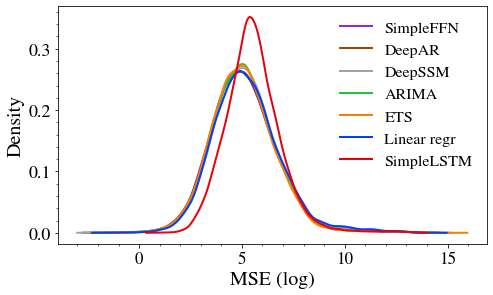

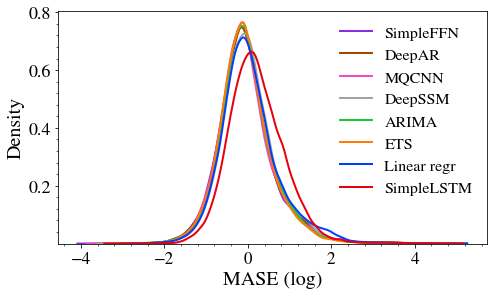

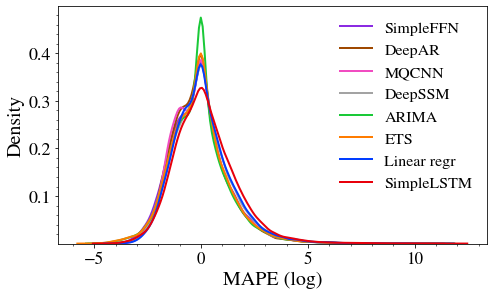

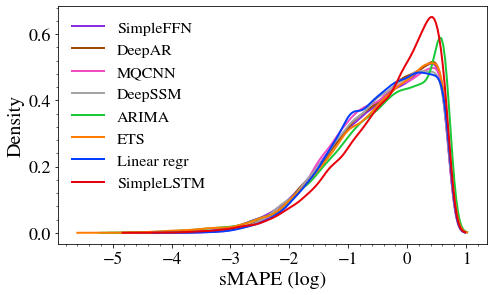

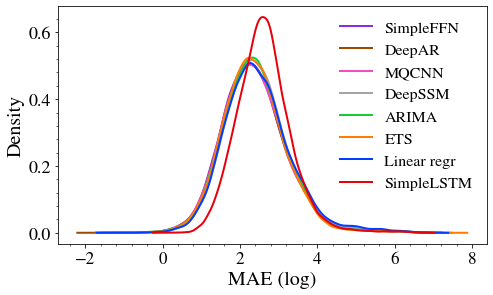

In [33]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle')) # half page width 


# avoid false positive SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

def plot_log_density(ax, metric, df):
    for gr, frame in df.groupby('predictor_id'):
        frame[f"log_{metric}"] = np.log(frame[metric])
        sns.kdeplot(
            data=frame, 
            x=f"log_{metric}",
            ax=ax,
            label=f"{legend_dict[gr]}",
            color=colour_dict[gr]
        )
    ax.legend(loc='best', frameon=False)
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    return ax

###################################################################
# Mean Squared Error
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MSE',
    df=item_metrics
)
ax.set_xlabel('MSE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mse.pdf'), dpi=300)
plt.show()

# #################################################################
# # Mean Absolute Scaled Error 
# #################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MASE',
    df=item_metrics
)
ax.set_xlabel('MASE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mase.pdf'), dpi=300)
plt.show()

###################################################################
# Mean Absolute Percentage Error 
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MAPE',
    df=item_metrics
)
ax.set_xlabel('MAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mape.pdf'), dpi=300)
plt.show()


###################################################################
# Symmetric Mean Absolute Percentage Error 
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='sMAPE',
    df=item_metrics
)
ax.set_xlabel('sMAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-sMAPE.pdf'), dpi=300)
plt.show()

###################################################################
# Mean Absolute Error
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MAE',
    df=item_metrics
)

ax.set_xlabel('MAE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mae.pdf'), dpi=300)
plt.show()

# ###################################################################
# # Root Mean Squared Error
# ###################################################################
# fig, ax = plt.subplots()
# ax = plot_log_density(
#     ax=ax,
#     metric='RMSE',
#     df=item_metrics
# )

# ax.set_xlabel('RMSE (log)')
# # plt.savefig(os.path.join(report_dir, 'images/kde-rmse.pdf'), dpi=300)
# plt.show()

# ###################################################################
# # Normalized Root Mean Squared Error
# ###################################################################
# fig, ax = plt.subplots()
# ax = plot_log_density(
#     ax=ax,
#     metric='NRMSE',
#     df=item_metrics
# )

# ax.set_xlabel('NRMSE (log)')
# # plt.savefig(os.path.join(report_dir, 'images/kde-nrmse.pdf'), dpi=300)
# plt.show()

# ###################################################################
# # Normalized Difference
# ###################################################################
# fig, ax = plt.subplots()
# ax = plot_log_density(
#     ax=ax,
#     metric='ND',
#     df=item_metrics
# )

# ax.set_xlabel('ND (log)')
# # plt.savefig(os.path.join(report_dir, 'images/kde-nd.pdf'), dpi=300)
# plt.show()



### Violin plots forecast metrics

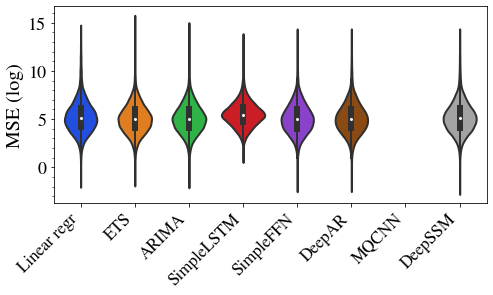

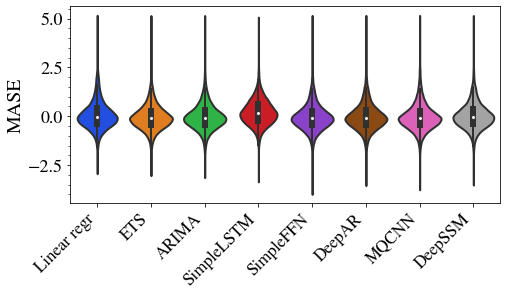

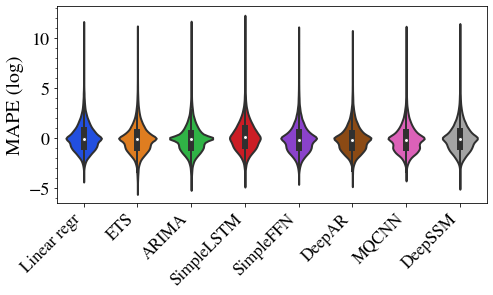

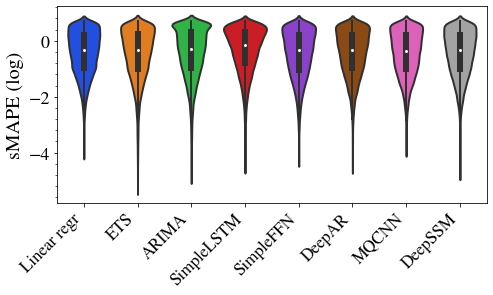

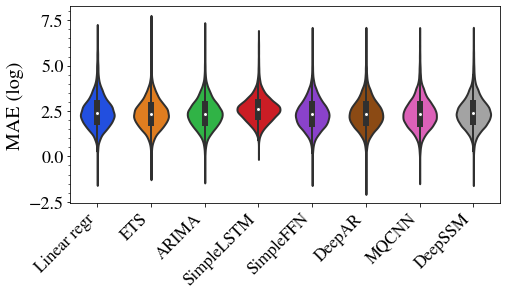

In [34]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle')) # use these for half page

def plot_log_violin(ax, metric, df):
    sns.violinplot(
        data=df,
        x="predictor",
        y=np.log(df[metric]),
        ax=ax,
        palette=colour_palette
    )
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    inv_predictor_dict = dict(map(reversed, predictor_dict.items()))
    ax.set_xticklabels(legend_dict.values(), rotation=45, ha="right")
    return ax


###################################################################
# Mean Squared Error 
###################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MSE',
    df=item_metrics,
)
ax.set_xlabel('')
ax.set_ylabel('MSE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-mse.pdf'), dpi=300)
plt.show()

# #################################################################
# # Mean Absolute Scaled Error 
# #################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MASE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MASE')
# plt.savefig(os.path.join(report_dir, 'images/violin-mase.pdf'), dpi=300)
plt.show()

#################################################################
# Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MAPE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-mape.pdf'), dpi=300)
plt.show()

#################################################################
# Symmetric Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='sMAPE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('sMAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-smape.pdf'), dpi=300)
plt.show()

#################################################################
# Absolute Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MAE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MAE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-ae.pdf'), dpi=300)
plt.show()

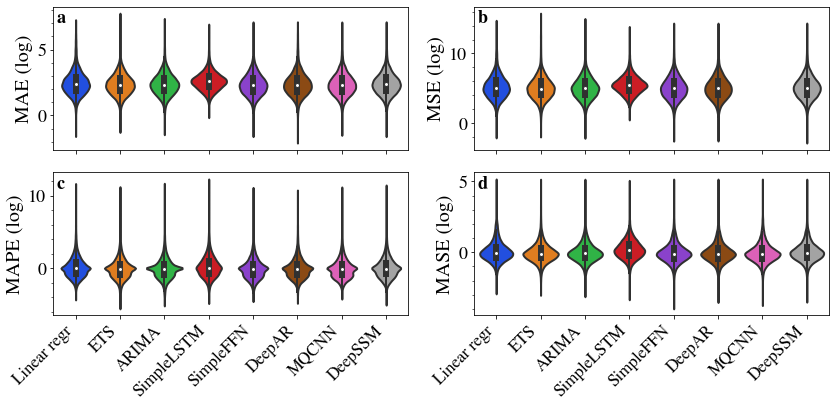

In [35]:
import string 


plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle')) # use these for half page

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12, 6))

#### MAE ####
sns.violinplot(
    data=item_metrics,
    x="predictor",
    y=np.log(item_metrics['MAE']),
    ax=axes[0][0],
    palette=colour_palette
)

#### MSE ####
sns.violinplot(
    data=item_metrics,
    x="predictor",
    y=np.log(item_metrics['MSE']),
    ax=axes[0][1],
    palette=colour_palette
)

#### MAPE ####
sns.violinplot(
    data=item_metrics,
    x="predictor",
    y=np.log(item_metrics['MAPE']),
    ax=axes[1][0],
    palette=colour_palette
)
sns.violinplot(
    data=item_metrics,
    x="predictor",
    y=np.log(item_metrics['MASE']),
    ax=axes[1][1],
    palette=colour_palette,
)

for i, (ax, ylabel) in enumerate(zip(axes.flat, ['MAE (log)', 'MSE (log)', 'MAPE (log)', 'MASE (log)'])): 
    ax.set_xlabel('')
    ax.set_ylabel(ylabel)                  
    ax.set_xticklabels(legend_dict.values(), rotation=45, ha='right')
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.text(0.01, 0.89, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')
    

# plt.savefig(os.path.join(report_dir, 'images/violin-metrics.pdf'), dpi=300)


### Quantile Coverage plots

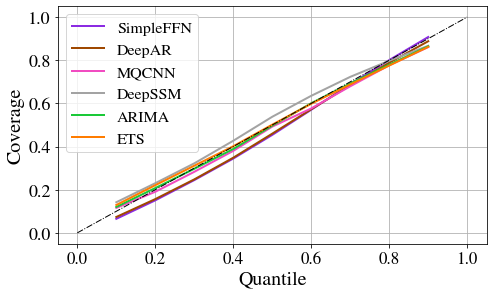

In [36]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

coverage = item_metrics.groupby('predictor_id').mean().filter(regex='Coverage')
coverage_labels = np.arange(0.1, 1, step=0.1)

fig, ax = plt.subplots()
for idx, vals in coverage.dropna().iterrows():
    ax.plot(
        coverage_labels,
        vals.values,
        color=colour_dict[idx],
        label=legend_dict[idx]
    )
ax.plot(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100), 
    ls='-.',
    color='black',
    lw=1)
    
ax.grid(which='both')
ax.set_xlabel('Quantile')
ax.set_ylabel('Coverage')
ax.legend()

# plt.savefig(os.path.join(report_dir, 'images/quantile-coverage.png'), dpi=300)

### Quantile loss plot

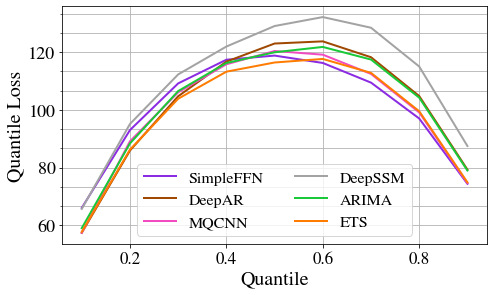

In [38]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

loss = item_metrics.groupby('predictor_id').mean().filter(regex='QuantileLoss')
loss_labels = np.arange(0.1, 1, step=0.1)

fig, ax = plt.subplots()
for idx, vals in loss.dropna().iterrows():
    ax.plot(
        loss_labels,
        vals.values,
        color=colour_dict[idx],
        label=legend_dict[idx]
    )
ax.yaxis.set_minor_locator(  AutoMinorLocator(3))    
ax.grid(which='both')
ax.set_xlabel('Quantile')
ax.set_ylabel('Quantile Loss')
ax.legend(ncol=2)

# plt.savefig(os.path.join(report_dir, 'images/quantile-loss.png'), dpi=300)

### Plot loss/coverage as one plot 

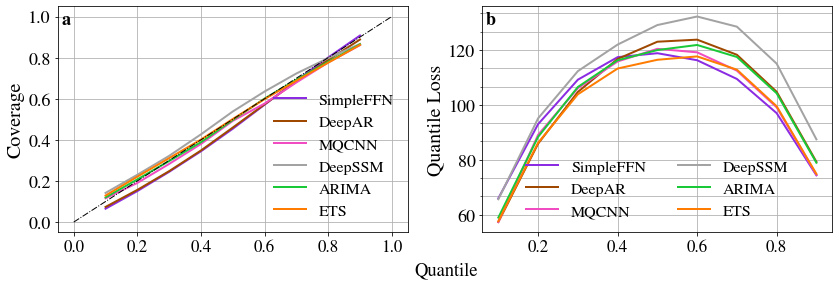

In [224]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))
fig, axes = plt.subplots(1, 2, figsize=(12,4))

#### coverage plot
coverage = item_metrics.groupby('predictor_id').mean().filter(regex='Coverage')
coverage_labels = np.arange(0.1, 1, step=0.1)

for idx, vals in coverage.dropna().iterrows():
    axes[0].plot(
        coverage_labels,
        vals.values,
        color=colour_dict[idx],
        label=legend_dict[idx]
    )
axes[0].plot(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100), 
    ls='-.',
    color='black',
    lw=1)
    
axes[0].grid(which='both')
axes[0].set_xlabel('')
axes[0].set_ylabel('Coverage')
axes[0].legend(loc='lower right', ncol=1, frameon=False)

#### QuantileLoss plot
loss = item_metrics.groupby('predictor_id').mean().filter(regex='QuantileLoss')
loss_labels = np.arange(0.1, 1, step=0.1)

for idx, vals in loss.dropna().iterrows():
    axes[1].plot(
        loss_labels,
        vals.values,
        color=colour_dict[idx],
        label=legend_dict[idx]
    )
axes[1].yaxis.set_minor_locator(  AutoMinorLocator(3))    
axes[1].grid(which='both')
axes[1].set_xlabel('')
axes[1].set_ylabel('Quantile Loss')
axes[1].legend(ncol=2, frameon=False)

for i, ax in enumerate(axes.flat): 
    ax.text(0.01, 0.92, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')
    
fig.text(0.53, 0., 'Quantile', ha='center', fontsize=18.5)
plt.savefig(os.path.join(report_dir, 'images/coverage-loss.pdf'), dpi=300, bbox_inches='tight')

### Robustness 

In [40]:
robustness = pd.read_csv(os.path.join(data_dir, 'robustness.csv'))

In [41]:
predictor_to_predictor_id = predictor_dict
predictor_id_to_predictor = dict(map(reversed, predictor_to_predictor_id.items()))
predictor_to_colour = {predictor_id_to_predictor[k]:v for k, v in colour_dict.items()}
predictor_to_legend = dict(zip(predictor_to_predictor_id.keys(), legend_labels))
predictor_dict_r = dict(map(reversed, predictor_dict.items()))
predictor_colour_dict = {predictor_id_to_predictor[k]:v for k, v in colour_dict.items()}

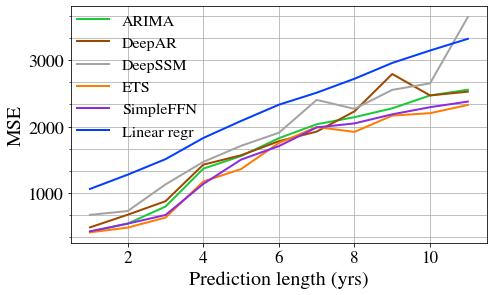

In [216]:
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import matplotlib as mpl


plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

robustness.loc[robustness['method_name']=="ets", 'predictor'] = "ETS"
robustness.loc[robustness['method_name']=="arima", 'predictor'] = "ARIMA"


def plot_metrics(ax, df, metric, legend_cols=1, legend_loc='upper left', xlabel='Prediction length (yrs)'):
    for gr, df in robustness.groupby('predictor'):
        
        if df[metric].isna().all():
            continue
        
        ax.plot(
            df['prediction_length'], 
            df[metric],
            label=predictor_to_legend[gr],
            color=predictor_colour_dict[gr]
        )

    ax.set_ylabel(f'{metric}')
    ax.set_xlabel(xlabel)
    ax.yaxis.set_minor_locator(AutoMinorLocator(3))
    ax.grid(which="both")
    ax.legend(ncol=legend_cols, loc=legend_loc, frameon=False, bbox_to_anchor=(-0.02, 1.03))
    return ax

fig, ax = plt.subplots()
plot_metrics(ax, robustness, metric='MSE')
# plt.savefig(os.path.join(report_dir, 'images/robustness-mwql.pdf'), dpi=300)

### Plot robustness as one plot

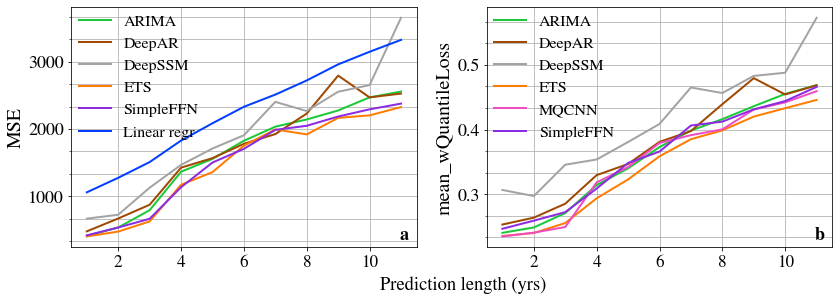

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(12,4.2))
plot_metrics(axes[0], robustness, metric='MSE', legend_cols=1, legend_loc='upper left', xlabel='')
plot_metrics(axes[1], robustness, metric='mean_wQuantileLoss', legend_cols=1, xlabel='')
for i, ax in enumerate(axes.flat): 
    ax.text(0.95, 0.03, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')
fig.text(0.55, 0., 'Prediction length (yrs)', ha='center', fontsize=18.5)
# plt.savefig(os.path.join(report_dir, 'images/robustness.pdf'), dpi=300, bbox_inches='tight')

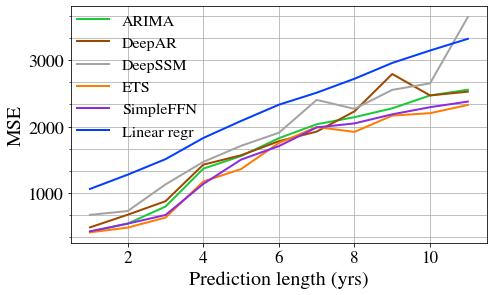

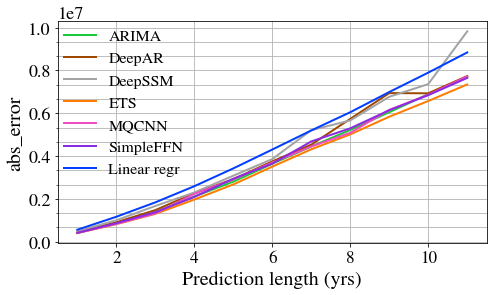

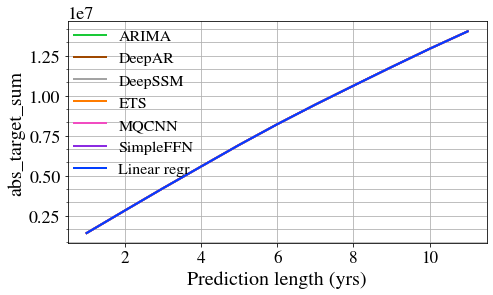

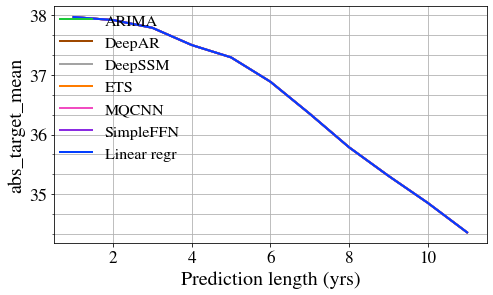

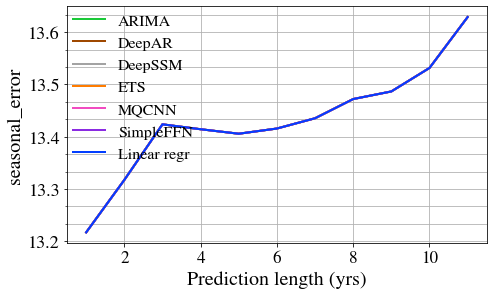

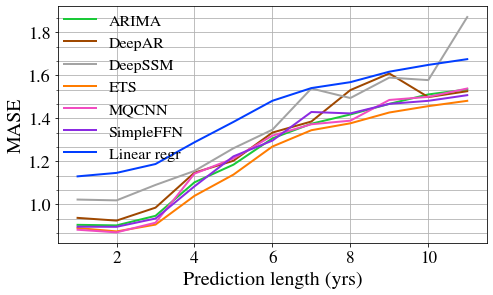

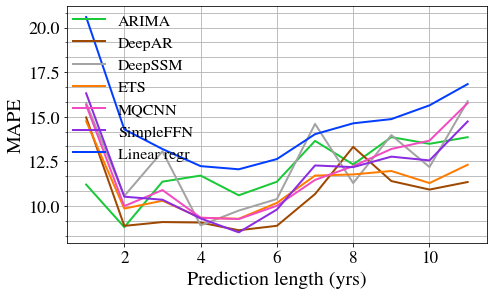

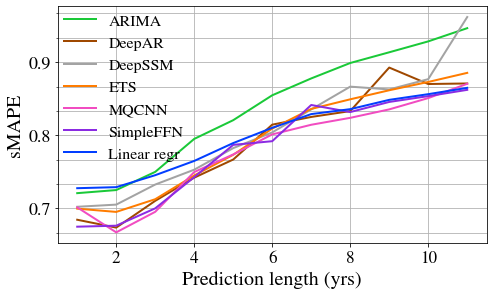

No handles with labels found to put in legend.


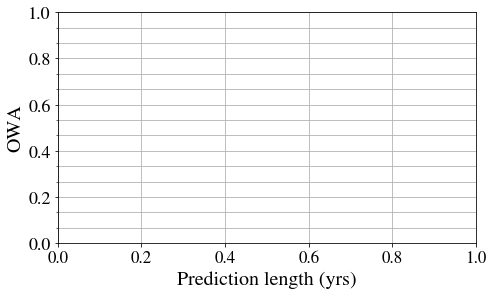

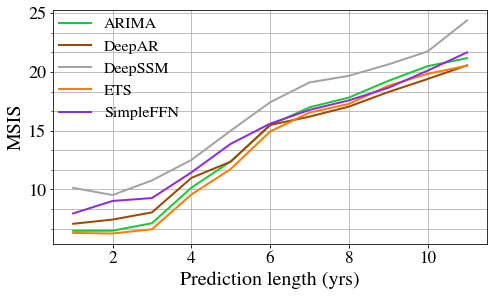

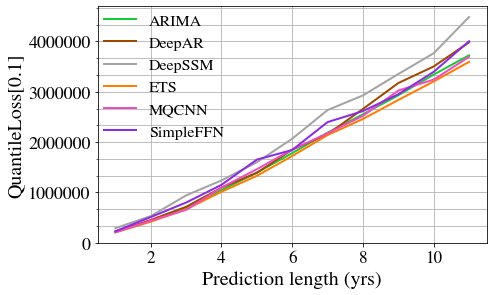

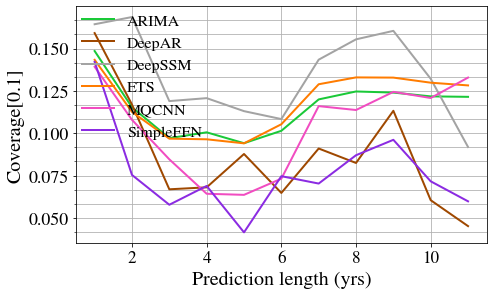

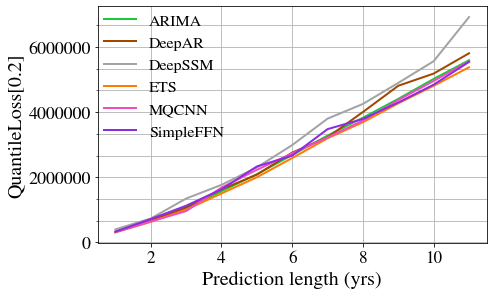

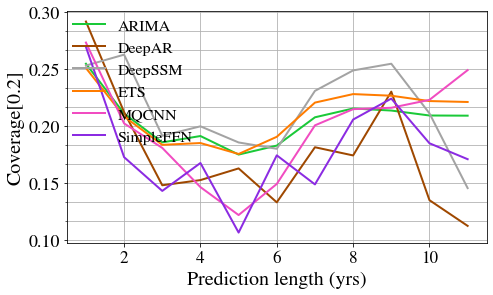

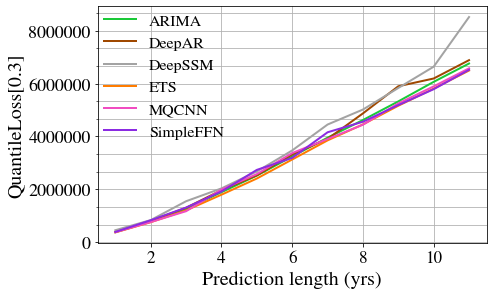

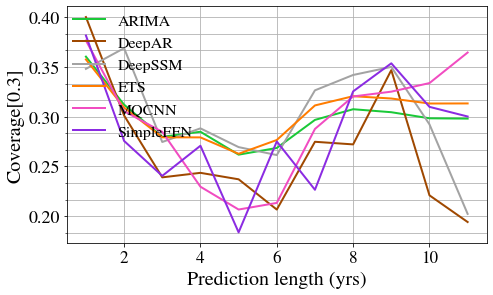

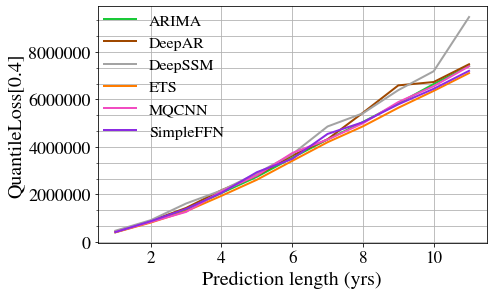

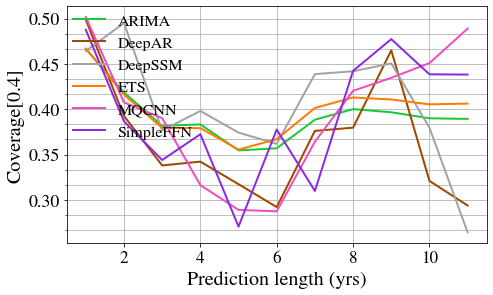

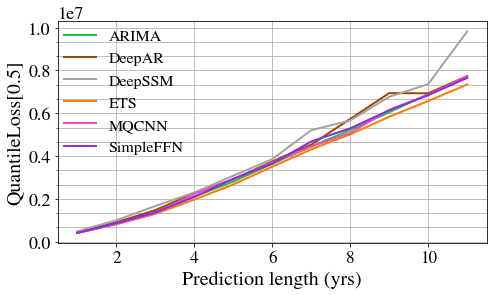

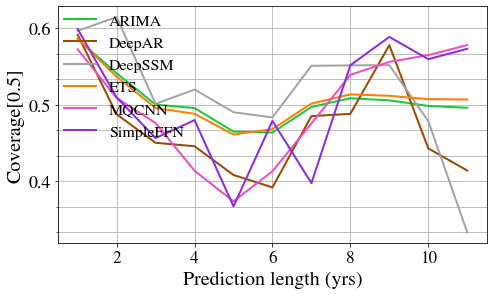

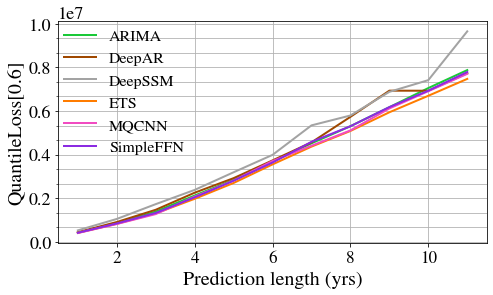

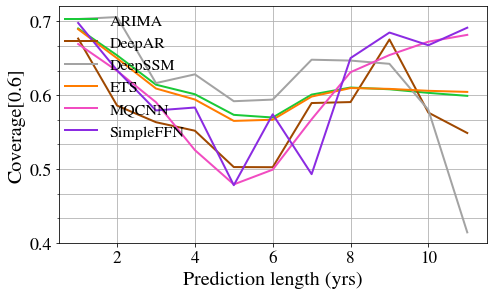

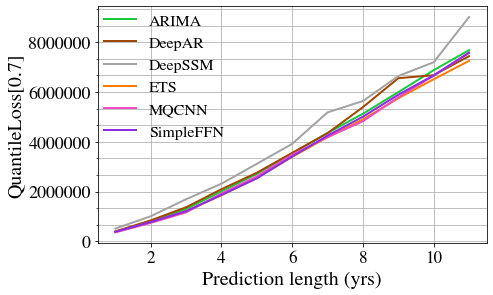

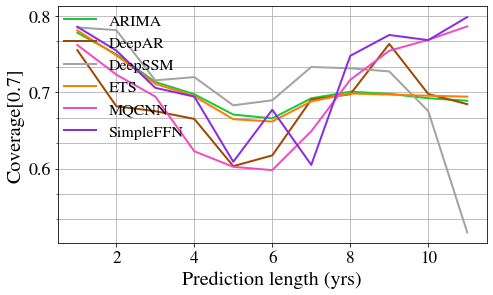

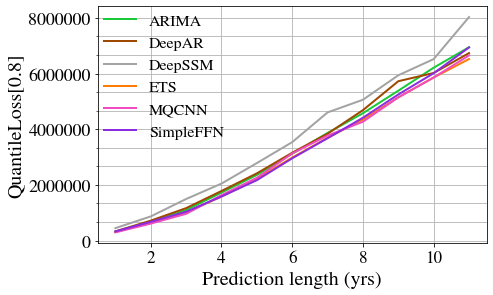

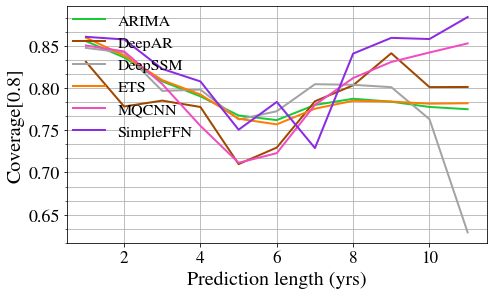

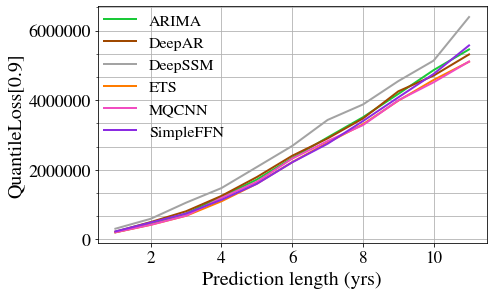

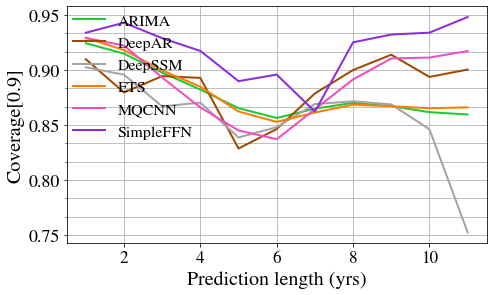

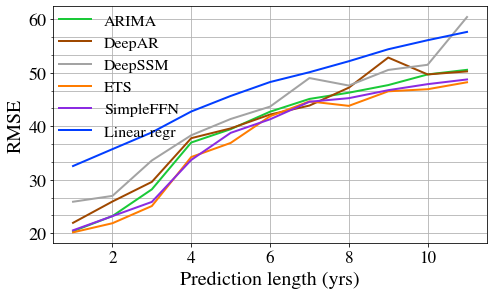

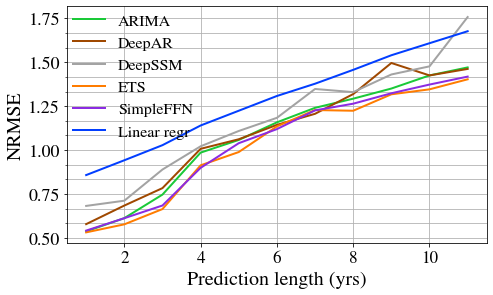

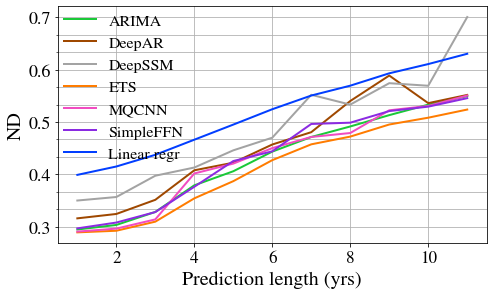

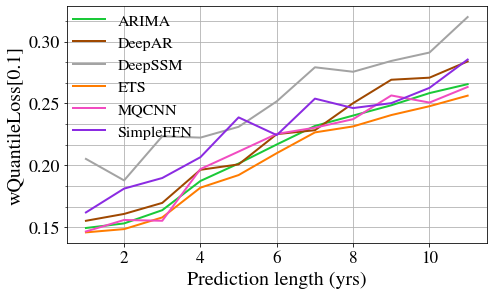

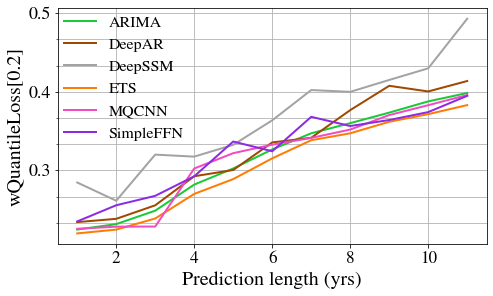

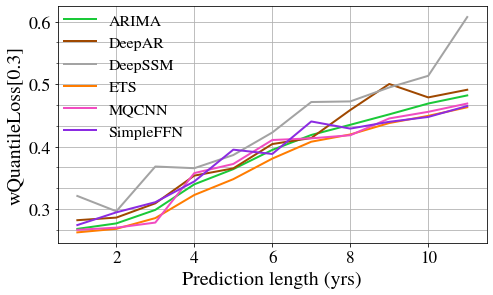

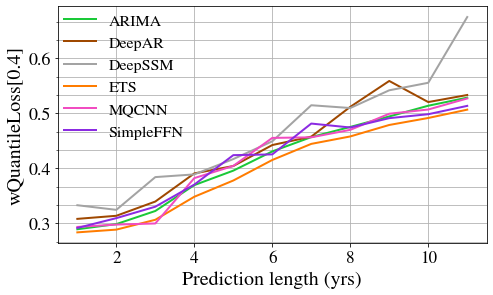

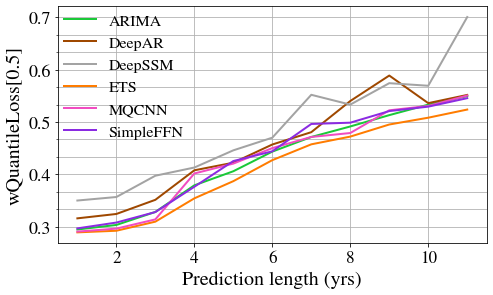

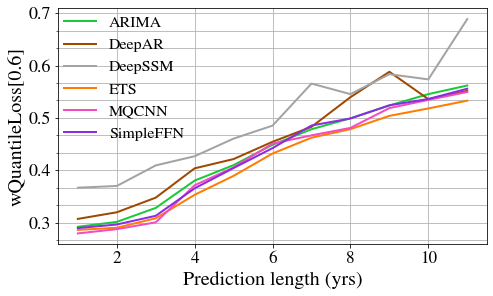

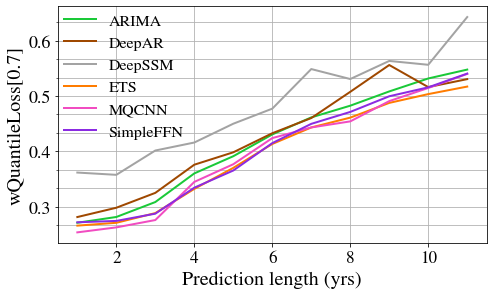

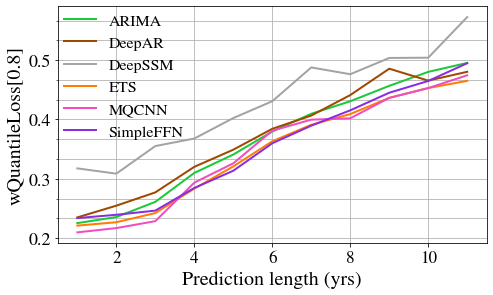

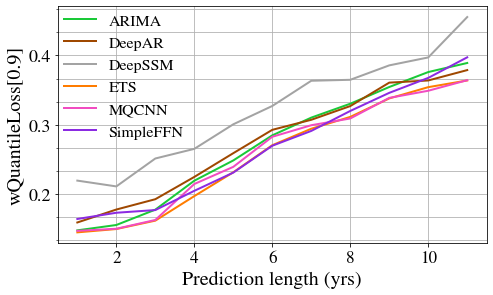

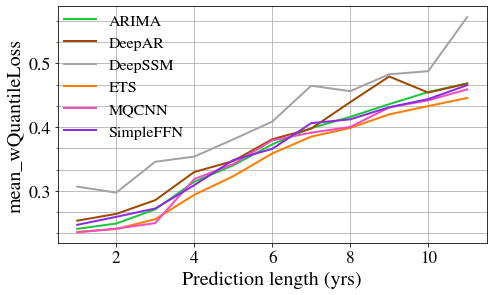

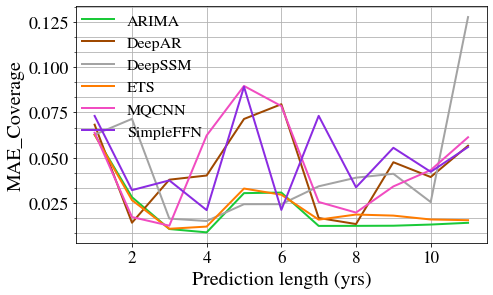

KeyError: 'nRMSE'

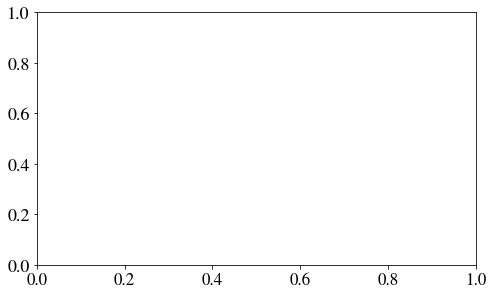

In [44]:
metrics_list = [
    'MSE', 'abs_error', 'abs_target_sum', 'abs_target_mean', 'seasonal_error', 'MASE', 
    'MAPE', 'sMAPE', 'OWA', 'MSIS', 'QuantileLoss[0.1]', 'Coverage[0.1]', 
    'QuantileLoss[0.2]', 'Coverage[0.2]', 'QuantileLoss[0.3]', 'Coverage[0.3]', 
    'QuantileLoss[0.4]', 'Coverage[0.4]', 'QuantileLoss[0.5]', 'Coverage[0.5]', 
    'QuantileLoss[0.6]', 'Coverage[0.6]', 'QuantileLoss[0.7]', 'Coverage[0.7]', 
    'QuantileLoss[0.8]', 'Coverage[0.8]', 'QuantileLoss[0.9]', 'Coverage[0.9]', 'RMSE', 
    'NRMSE', 'ND', 'wQuantileLoss[0.1]', 'wQuantileLoss[0.2]', 'wQuantileLoss[0.3]', 
    'wQuantileLoss[0.4]', 'wQuantileLoss[0.5]', 'wQuantileLoss[0.6]', 
    'wQuantileLoss[0.7]', 'wQuantileLoss[0.8]', 'wQuantileLoss[0.9]', 
    'mean_wQuantileLoss', 'MAE_Coverage', 'nRMSE', 'MAE'
]

for metric in metrics_list:
    fig, ax = plt.subplots()
    plot_metrics(ax, robustness, metric=metric)
    plt.show()


## GluonTS forecast visualization

### GluonTS dataloader

In [12]:
# specify metadata for loading gluonts dataset 
metadata = {
    'num_series': len(tf),
    'num_steps': len(tf.columns),
    'prediction_length': 7,
    'freq': "AS",
    'start': [pd.Timestamp("01-01-1984", freq='AS') for _ in range(len(tf))],
    'item_id': tf.index.values,
    'epochs': 10,
    'save_model': True,
    'evaluate_model': True,
}

In [13]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o


def get_gluon_ds(df, metadata, sites, cat_vars=['fcluster', 'dbscan_cluster'], 
                 sample=None, shuffle=False, get_transects=None):
    
    if get_transects is not None:
        df = df.loc[get_transects]
    
    if sample is not None:
        df = df.sample(sample)
        
    if shuffle is True:
        df = df.sample(frac=1)
        
    metadata_ = metadata.copy()
    metadata_['num_series'] = len(df)
    metadata_['item_id'] = df.index.values
    metadata_['start'] = metadata['start'][:len(df)]
    
    sites_ = sites.copy()
    sites_ = sites_.loc[sites_['transect_id'].isin(df.index)]
    sites_ = sites_.set_index('transect_id')
    sites_ = sites_.reindex(df.index)
    
    features = dict()
    features['num_series'] = metadata_['num_series']
    for cat in traverse(cat_vars):
        features[cat] = sites_[cat].unique()
        features[cat] = sites_[cat].unique()
    features['cat_vars'] = cat_vars
    
    train_ds = ListDataset(
        [
         {
             FieldName.TARGET: target,
             FieldName.START: start,
             FieldName.ITEM_ID: item_id,
             FieldName.FEAT_STATIC_CAT: [fclust, dbclust],
             FieldName.FEAT_STATIC_REAL: [fsr]
          }

         for (target, start, item_id, fclust, dbclust, fsr) in zip(df.values[:, :-metadata_['prediction_length']],
                                            metadata_['start'], 
                                            metadata_['item_id'],
                                            sites_['fcluster'].values,
                                            sites_['dbscan_cluster'].values,
                                            sites_['changerate_unc'].values)
        ], freq=metadata_['freq'])

    test_ds = ListDataset(
        [
         {
             FieldName.TARGET: target,
             FieldName.START: start,
             FieldName.ITEM_ID: item_id,
             FieldName.FEAT_STATIC_CAT: [fclust, dbclust],
             FieldName.FEAT_STATIC_REAL: [fsr]
          }

         for (target, start, item_id, fclust, dbclust, fsr) in zip(df.values,
                                            metadata_['start'], 
                                            metadata_['item_id'],
                                            sites_['fcluster'].values,
                                            sites_['dbscan_cluster'].values,
                                            sites_['changerate_unc'].values)
        ], freq=metadata_['freq'])
          
    return train_ds, test_ds, features




### Predictor iterators
Get dictionary with iterator for all forecast algorithms 

In [14]:
# Some transects 
selection = [
        'BOX_160_055_340', 'BOX_160_055_341', 'BOX_160_055_342', 'BOX_160_132_31', 
        'BOX_096_001_2', 'BOX_051_151_21', 'BOX_051_151_39', 
        'BOX_051_151_41', 'BOX_051_152_11', 'BOX_051_152_20', 'BOX_051_152_21', 
        'BOX_171_181_14', 'BOX_161_019_166', 
        'BOX_172_049_15', 'BOX_138_474_42', 'BOX_160_033_99', 'BOX_172_513_22'
    ]

### Plot forecast function

In [15]:
import matplotlib.dates as mdates
from scipy import stats


# extrapolate ols function
y = lambda intercept, slope, x: intercept + slope * x


def ols(obs, forecast_horizon=None):
    x = range(len(obs))
    slope, intercept, _, _, _ = stats.linregress(x, obs)
    if forecast_horizon is not None:
        x = range(len(obs) + forecast_horizon)
    return [y(intercept, slope, x) for x in x]


# quantile boundaries
qbounds = {
    "all_q": [0.05, 0.25, 0.75, 0.95],
    "limited_q": [0.1, 0.3, 0.7, 0.9]
}


def plot_prob_forecast(ts, fcst, ax, forecast_mode='evaluation', show_ols=False, 
                       xlabel='Time (yrs)', ylabel='Shoreline position (m)', set_legend=True, ylim=None):
    start = ts['start']
    # handle ts input when forecasting
    if isinstance(ts, dict):
        ts = pd.Series(
            ts['target'],
            index=pd.date_range(
                start=ts['start'],
                periods=len(ts['target']),
                freq='AS-JAN'
            )
        )
    
    ax.plot(ts.index, ts.values, label='observed')
    ax.plot(fcst.index, fcst.median, label='median', color='darkgreen')
    
    if show_ols is True:
        ols_series = pd.Series(
            ols(ts.values, forecast_horizon=len(fcst.index)),
            index=pd.date_range(
                start=start,
                periods=len(ts.index)+len(fcst.index),
                freq='AS-JAN'
            )
        )
        ax.plot(ols_series.index, ols_series.values, label='OLS', linestyle='--')
    
    if np.isnan(fcst.quantile(0.95)).all():
        quantiles = qbounds['limited_q']
    else:
        quantiles = qbounds['all_q']
    
    
    ax.fill_between(
        fcst.index, 
        fcst.quantile(quantiles[0]), 
        fcst.quantile(quantiles[-1]), 
        facecolor='green',
        alpha=0.4,
        label=f'{int(np.round(quantiles[-1]-quantiles[0], 2)*100)}%'
    )
    
    
    ax.fill_between(
        fcst.index, 
        fcst.quantile(quantiles[1]), 
        fcst.quantile(quantiles[-2]), 
        facecolor='green',
        alpha=0.55,
        label=f'{int(np.round(quantiles[-2]-quantiles[1], 2)*100)}%'    
    )
    
    axvline_idx = {
        "evaluation": ts.index[-(len(fcst.median)+1)],
        "forecast": ts.index[-1]
    }

    ax.axvline(
        x=axvline_idx[forecast_mode],
        color='red', 
        linestyle='--'
    )

    ax.xaxis.set_minor_locator(
        AutoMinorLocator(5)
    )
    ax.xaxis.set_major_locator(
        mdates.YearLocator(base=6)
    )
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%Y')
    )

    if ylim is not None:
        ax.set_ylim(ylim)
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid(which="both")
    
    if set_legend is False:
        return ax
    ax.legend(loc="best")
    return ax

In [16]:
from pathlib import Path
from gluonts.model.predictor import Predictor

from gluonts.model.r_forecast import RForecastPredictor
from gluonts.evaluation.backtest import make_evaluation_predictions


def get_rforecast_predictor(method: str):
    return RForecastPredictor(
        freq=metadata['freq'],
        prediction_length=metadata['prediction_length'],
        method_name = method
    )


def load_predictors(pred_fnames, add_rforecast=False):
    predictors = dict()
    for i in pred_fnames:
        predictors[i] = Predictor.deserialize(
            Path(os.path.join(model_dir, i))
        )
    if add_rforecast is True:
        predictors['ets'] = get_rforecast_predictor(method='ets')
        predictors['arima'] = get_rforecast_predictor(method='arima')
    return predictors


def get_forecast_it(train_ds, test_ds, predictors, forecast_mode):
    
    forecast_modes = {
        "evaluation": train_ds,
        "forecast": test_ds
    }
    
    ds = forecast_modes[forecast_mode]
    
    forecast_it = {}
    for k,v in predictors.items():
        forecast_it[k] = v.predict(ds)
    return iter(test_ds), forecast_it


def get_next_forecast(ts_it, forecast_it):
    ts = next(ts_it)
    forecasts = {}
    for k, v in forecast_it.items():
        forecasts[k] = next(v)
    return ts, forecasts

# file names of predictors
pred_fnames = [
    'SimpleFeedForwardEstimator-419',
    'DeepAREstimator-420',
    'MQCNNEstimator-421',
    "DeepStateEstimator-422"
]

# set according to trained models 
metadata['prediction_length'] = 7 

train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
#     get_transects=duck_dbscan_z.index.to_list()
#     get_transects=None
#     get_transects=worst_fcst_tf.index.unique().to_list()
    get_transects = ['BOX_160_033_99']
)

# load predictors
predictors = load_predictors(pred_fnames, add_rforecast=True)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="evaluation")

/media/storage/dev/shorelineforecasting/shorelineforecasting/venv/lib/python3.8/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

  warnings.warn(x, RRuntimeWarning)


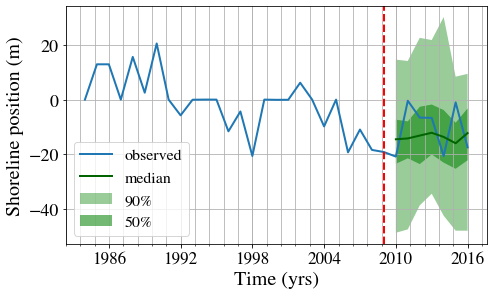

In [17]:
# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

fig, ax = plt.subplots()
plot_prob_forecast(ts_, fcst_['SimpleFeedForwardEstimator-419'], ax, forecast_mode='evaluation', show_ols=False)

### Create figure for article

NameError: name 'get_nlargest_tf' is not defined

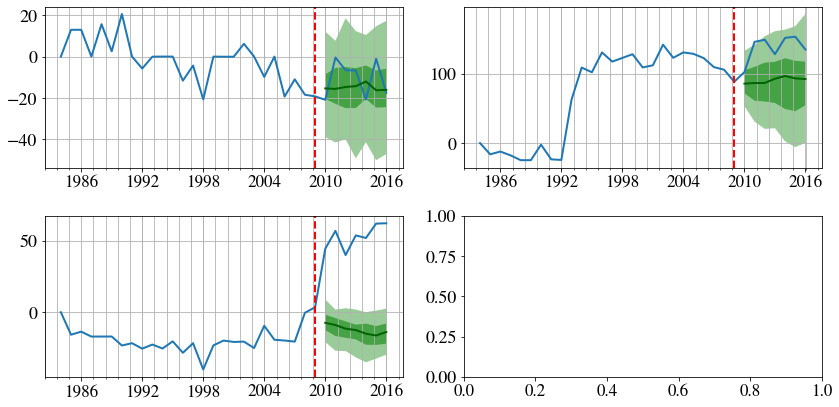

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

metadata['prediction_length'] = 7 

#### SimpleFFN ####
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ['BOX_160_033_99']
)

# load predictors
predictors = load_predictors(pred_fnames, add_rforecast=True)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="evaluation")

# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

plot_prob_forecast(ts_, fcst_['SimpleFeedForwardEstimator-419'], axes.flat[0], forecast_mode='evaluation', 
                   show_ols=False, set_legend=False, ylabel='', xlabel='')


#### ETS ####
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ['BOX_160_132_31']
)

# load predictors
predictors = load_predictors(pred_fnames, add_rforecast=True)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="evaluation")

# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

# plot 
plot_prob_forecast(ts_, fcst_['ets'], axes.flat[1], forecast_mode='evaluation', 
                   show_ols=False, xlabel='', ylabel='', set_legend=False)


#### ARIMA ####
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ['BOX_051_151_39']
)

# load predictors
predictors = load_predictors(pred_fnames, add_rforecast=True)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="evaluation")

# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

# plot
plot_prob_forecast(ts_, fcst_['arima'], axes.flat[2], forecast_mode='evaluation', 
                   show_ols=False, set_legend=False, xlabel='', ylabel='')


#### Worst Forecasta
worst_fcst_tf = get_nlargest_tf(
    tf_t, 
    item_metrics, 
    filter_metric='MSE', 
    npercent=0.05, 
    pred_grouped=False, 
    unique=False
)
plot_line_density(axes.flat[3], scale_df(worst_fcst_tf.T, 'standarize'), ylabel='Shline pos. (z)', 
                  xlabel='', cbar_label='Agg. s. count')

for i, ax in enumerate(axes.flat): 
    ax.text(0.007, 0.9, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')

 # create some space below the plots by increasing the bottom-value

    
    
# fig.subplots_adjust(top=0.8, left=0.1, right=0.9, bottom=0.2) 
handles, labels = axes.flat[2].get_legend_handles_labels()
# axes.flat[-1].legend(handles, labels, loc='lower left', ncol=4, bbox_to_anchor=(0.25, 1))
# axes.flat[-1].legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.25, -0.5))
fig.legend(handles, labels, loc='lower left', ncol=4, bbox_to_anchor=(0.25, 1))
fig.text(0.5, 0, 'Time (yrs)', ha='center', fontsize=18.5)
fig.text(-0.01, 0.5, 'Shoreline position (m) ', va='center', rotation='vertical', fontsize=18.5)
# plt.savefig(os.path.join(report_dir, 'images/evaluation-forecasts.pdf'), dpi=300, bbox_inches='tight')

### Forecast until 2030

In [19]:
# file names of 2030 predictors
forecast_predictors = [
    'SimpleFeedForwardEstimator-618',
    'DeepAREstimator-619',
    'MQCNNEstimator-620',
    "DeepStateEstimator-621"
]

# set according to trained models 
metadata['prediction_length'] = 14

# get gluonts dataset
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = duck_dbscan_z.index.to_list()
)

# load predictors
predictors = load_predictors(forecast_predictors, add_rforecast=False)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="forecast")

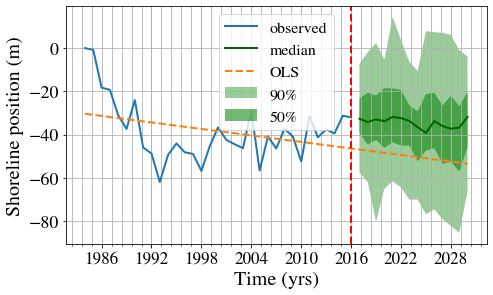

In [20]:
# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

# plot forecast 
fig, ax = plt.subplots()

plot_prob_forecast(
    ts_, 
    fcst_['SimpleFeedForwardEstimator-618'], 
    ax, 
    forecast_mode='forecast', 
    show_ols=True, 
    xlabel='Time (yrs)', 
    ylabel='Shoreline position (m)', 
    set_legend=True
)

### Create plot for article

No handles with labels found to put in legend.


Text(0.55, 0.0, 'Time (yrs)')

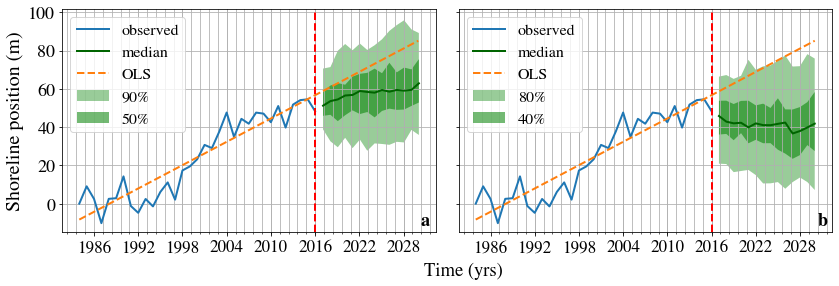

In [22]:
import string


#get gluonts dataset
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ['BOX_160_055_348']
)

# load predictors
predictors = load_predictors(forecast_predictors, add_rforecast=False)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="forecast")

# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True, sharex=True)

#### DeepAR Forecast
plot_prob_forecast(
    ts_,
    fcst_['DeepAREstimator-619'], 
    axes[0],
    forecast_mode='forecast',
    show_ols=True,
    xlabel=''
)
plt.legend(loc='upper left')


#### MQCNN Forecast
plot_prob_forecast(
    ts_,
    fcst_['MQCNNEstimator-620'], 
    axes[1],
    forecast_mode='forecast',
    show_ols=True,
    ylabel='',
    xlabel='',
    ylim=[-15, 102]
)
plt.legend(loc='upper left')

for i, ax in enumerate(axes.flat): 
    ax.text(0.96, 0.03, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')

fig.text(0.55, 0., 'Time (yrs)', ha='center', fontsize=18.5)
# plt.savefig(os.path.join(report_dir, 'images/forecast-examples.pdf'), dpi=300, bbox_inches='tight')

### Graphical abstract

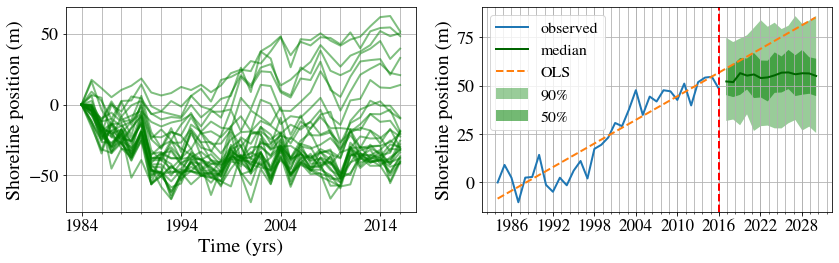

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(12,4))

plot_multiple_ts(axes[0], tf_duck_dbscan.T, ylabel='Shoreline position (m)')


#get gluonts dataset
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ['BOX_160_055_348']
)

# load predictors
predictors = load_predictors(forecast_predictors, add_rforecast=False)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(train_ds, test_ds, predictors, forecast_mode="forecast")

# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

#### DeepAR Forecast
plot_prob_forecast(
    ts_,
    fcst_['DeepAREstimator-619'], 
    axes[1],
    forecast_mode='forecast',
    show_ols=True,
    xlabel=''
)
plt.legend(loc='upper left')



### Some old functions

In [254]:
# ts, forecasts = get_next_forecast(ts_it, forecast_it)

# fig, ax = plt.subplots()



def run_once(f):
    def wrapper(*args, **kwargs):
        if not wrapper.has_run:
            wrapper.has_run = True
            return f(*args, **kwargs)
    wrapper.has_run = False
    return wrapper
    

def plot_prob_forecast_together(ts, forecasts_, ax, plt_type='eval', show_ols=False, show_predictor=None):
    start = ts['start']
    # handle ts input when forecasting
    if isinstance(ts, dict):
        ts = pd.Series(
            ts['target'],
            index=pd.date_range(
                start=ts['start'],
                periods=len(ts['target']),
                freq='AS-JAN'
            )
        )

    @run_once
    def plot_ols(ts, fcst):
        ols_series = pd.Series(
            ols(ts.values, forecast_horizon=len(fcst.index)),
            index=pd.date_range(
                start=start,
                periods=len(ts.index)+len(fcst.index),
                freq='AS-JAN'
            )
        )
        ax.plot(ols_series.index, ols_series.values, label='OLS', linestyle='--')
    
    if show_predictor is not None:
        forecasts_ = forecasts[only_show_predictor]
    
    ax.plot(ts.index, ts.values, label='observed')
    for predictor, fcst in forecasts_.items():
        color = predictor_to_colour[predictor.split('-')[0]]
        ax.plot(fcst.index, fcst.median, label=predictor, color=color)
        if show_ols is True: 
            plot_ols(ts, v)
    

    
        if np.isnan(fcst.quantile(0.95)).all():
            quantiles = qbounds['limited_q']
        else:
            quantiles = qbounds['all_q']


        ax.fill_between(
            fcst.index, 
            fcst.quantile(quantiles[0]), 
            fcst.quantile(quantiles[-1]), 
            facecolor=color,
            alpha=0.3,
            label=f'{int(np.round(quantiles[-1]-quantiles[0], 2)*100)}%'
        )


        ax.fill_between(
            fcst.index, 
            fcst.quantile(quantiles[1]), 
            fcst.quantile(quantiles[-2]), 
            facecolor=color,
            alpha=0.55,
            label=f'{int(np.round(quantiles[-2]-quantiles[1], 2)*100)}%'    
        )
    
    axvline_idx = {
        "eval": ts.index[-(len(fcst.median)+1)],
        "forecast": ts.index[-1]
    }

    ax.axvline(
#         x=ts.index[-(len(fcst.median)+1)],
        x=axvline_idx[plt_type],
        color='red', 
        linestyle='--'
    )

    ax.xaxis.set_minor_locator(
        AutoMinorLocator(5)
    )
    ax.xaxis.set_major_locator(
        mdates.YearLocator(base=6)
    )
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%Y')
    )
    
    ax.set_ylabel('Shoreline position (m)')
    ax.set_xlabel('Time (yrs)')
    ax.grid(which="both")
#     ax.legend(loc="best")
    return ax
    
# plot_prob_forecast_together(ts, forecasts, ax, plt_type='forecast', show_ols=True, show_predictor=None)

In [240]:
predictor_to_predictor_id = predictor_dict
predictor_id_to_predictor = dict(map(reversed, predictor_to_predictor_id.items()))
predictor_to_colour = {predictor_id_to_predictor[k]:v for k, v in colour_dict.items()}
predictor_to_legend = dict(zip(predictor_to_predictor_id.keys(), legend_labels))

None


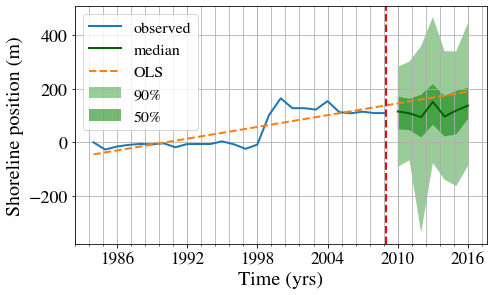

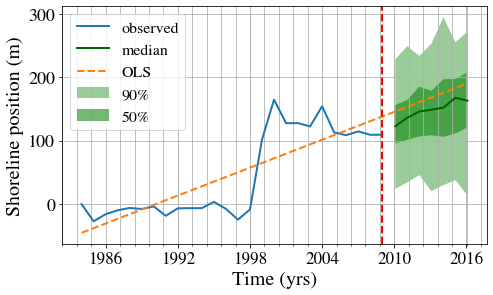

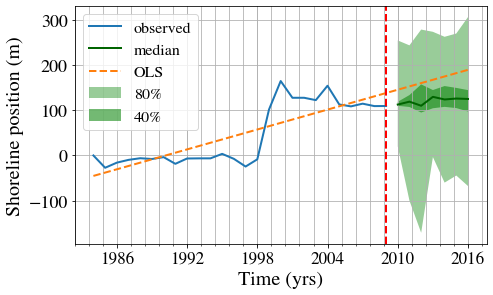

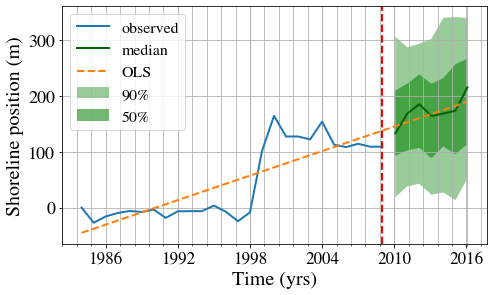

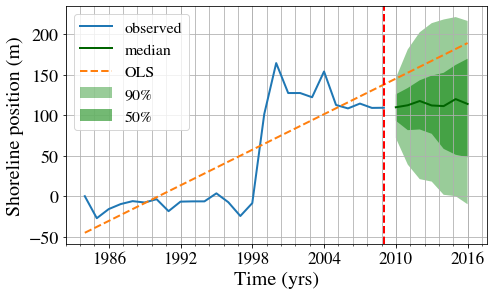

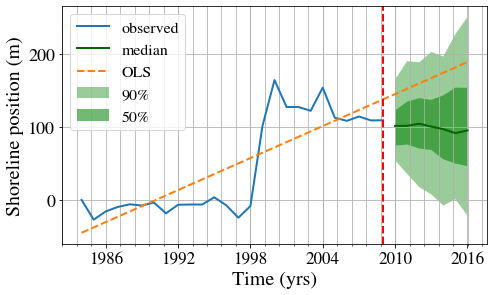

In [243]:
def get_next_forecast(ts_it, forecast_it):
    ts = next(ts_it)
    forecasts = {}
    for k, v in forecast_it.items():
        forecasts[k] = next(v)
    return ts, forecasts

ts, forecasts = get_next_forecast(ts_it, forecast_it)

for k, v in forecasts.items():
    fig, ax = plt.subplots()
    plot_prob_forecast(ts, v, ax, plt_type='forecast', show_ols=True)
    transect_id = v.item_id
print(transect_id)

In [33]:
folium_colors = [
    'red', 'blue', 'gray', 'darkred', 'lightred', 'orange', 'beige',
    'green', 'darkgreen', 'lightgreen', 'darkblue', 'lightblue',
    'purple', 'darkpurple', 'pink', 'cadetblue', 'lightgray', 'black'
]

output_file = "shorelines.html"
m = folium.Map(location=(0,0), zoom_start=1)

# tile = folium.TileLayer(
#         tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
#         attr = 'Esri',
#         name = 'Esri Satellite',
#         overlay = True,
#         control = True
#        ).add_to(m)



In [35]:
for i in selection:
    add_to_map(m, [i])
m.save(output_file)
webbrowser.open(output_file)  # open in new tab


True

In [58]:
add_to_map(m, ['BOX_051_151_39'])
m.save(output_file)


BOX_172_513_22


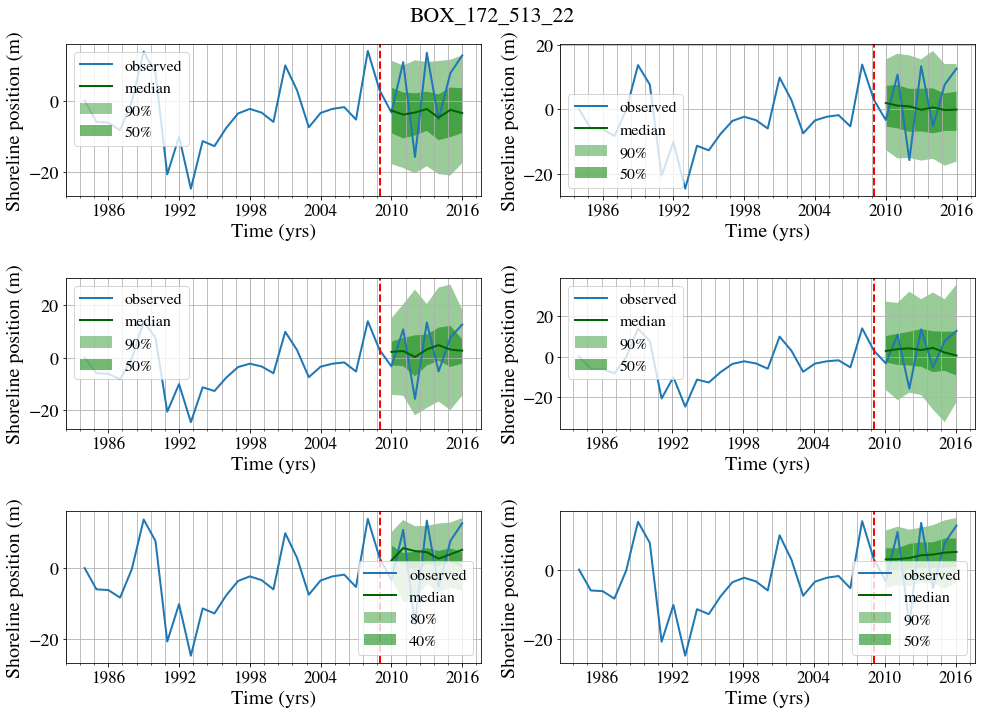

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
fig.subplots_adjust(top=0.8)

for axs, data in zip(axes.flatten(), [ets_it, arima_it, simpleffn_it, deepar_it, mqcnn_it, deepssm_it]):
    ts, fcst = next(data[1]), next(data[0])
    plot_prob_forecast(ts, fcst, axs)
plt.suptitle(f"{fcst.item_id}", y=1)

# to map
add_to_map(m, [fcst.item_id])
m.save(output_file)
print(fcst.item_id)


In [48]:
sites.loc[sites['transect_id']=='BOX_160_132_31'][['Intersect_lon', 'Intersect_lat']]

Intersect_lon  Intersect_lat
13680      -74.58396      39.267216

In [59]:
webbrowser.open(output_file)  # open in new tab

True

### Forecasts for report

In [197]:
def get_forecast(it):
    return next(it[1]), next(it[0])

interest = ['BOX_160_055_340', 'BOX_160_055_341', 'BOX_160_055_342', 'BOX_160_132_31', 'BOX_096_001_2', 'BOX_171_133_2', 'BOX_051_151_39', 'BOX_051_151_41', 'BOX_051_152_11', 'BOX_051_152_20', 'BOX_051_152_21', 'BOX_171_181_14', 'BOX_138_445_414', 'BOX_172_025_343', 'BOX_161_019_166', 'BOX_172_049_15', 'BOX_171_121_5', 'BOX_138_474_42', 'BOX_160_033_99', 'BOX_172_513_22']

TypeError: 'SampleForecast' object is not subscriptable

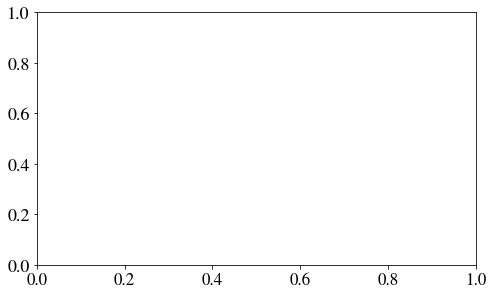

In [248]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ["BOX_160_132_31"]
)

predictor_its = get_predictor_its(test_ds)

fig, ax = plt.subplots()
ts, fcst = get_forecast(predictor_its["arima"])
plot_prob_forecast(ts, fcst, ax)
# plt.savefig(os.path.join(report_dir, 'images/ffn-BOX_.pdf'), dpi=300)



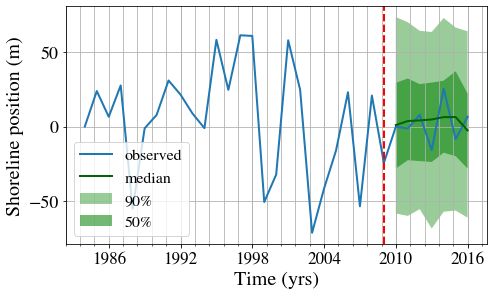

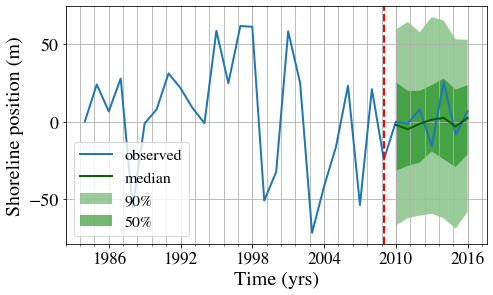

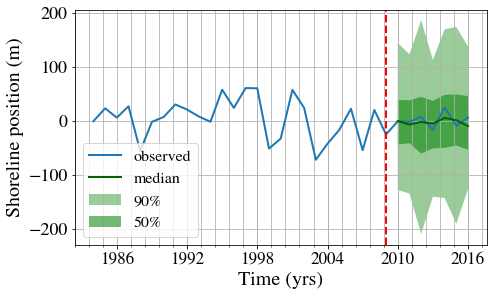

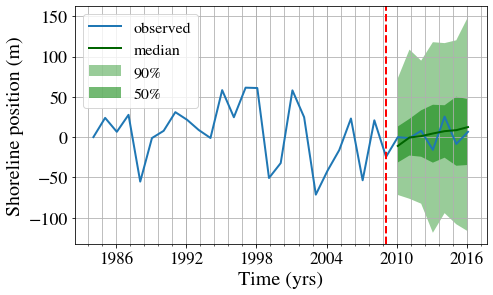

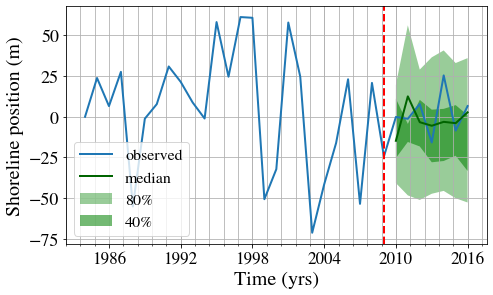

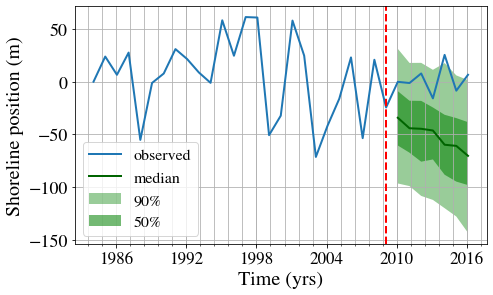

In [623]:

for method in ["ets", "arima", "simpleffn", "deepar", "mqcnn", "deepssm"]:
    train_ds, test_ds, features = get_gluon_ds(
        df=tf_t,
        metadata=metadata,
        sites=sites,
        shuffle=True,
        sample=None,
        get_transects = ["BOX_183_560_59"]
        )
    predictor_its = get_predictor_its(test_ds)

    fig, ax = plt.subplots()
    ts, fcst = get_forecast(predictor_its[method])
    plot_prob_forecast(ts, fcst, ax)
    plt.show()

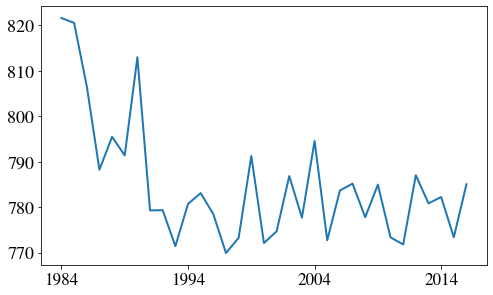

In [73]:
tf.loc['BOX_160_055_318'].plot()

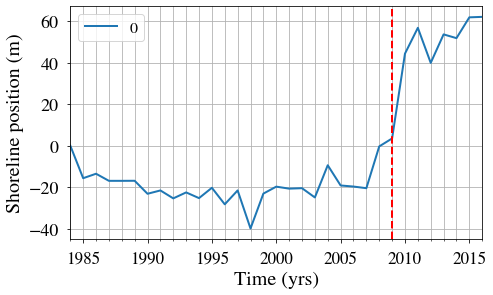

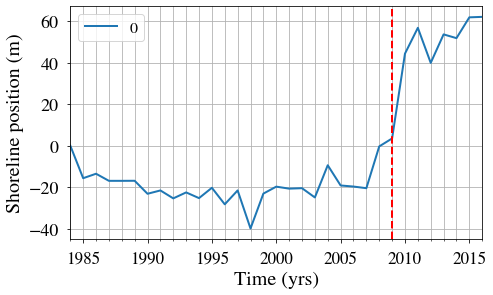

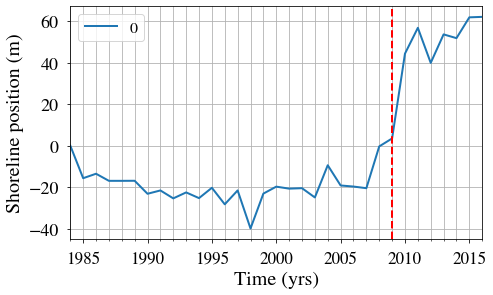

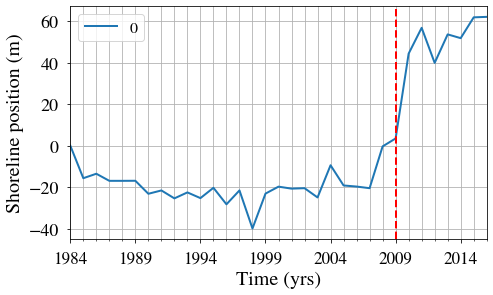

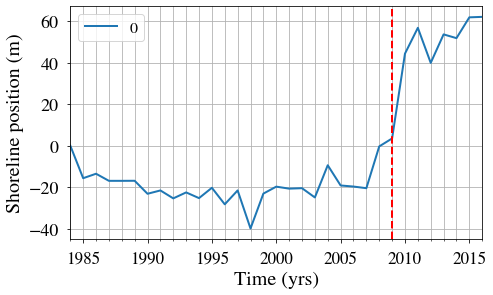

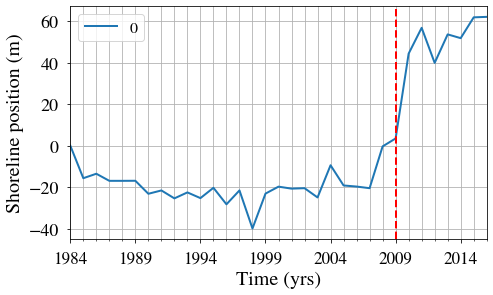

In [453]:
for i in [arima_it, ets_it, simpleffn_it, deepar_it, mqcnn_it, deepssm_it]:
    fig, ax = plt.subplots()
    plot_prob_forecast(ax, next(i[1]), next(i[0]))
    plt.show()

## Pure prediction

In [175]:
simpleffn_path = os.path.join(model_dir, 'SimpleFeedForwardEstimator-614')
deepar_path = os.path.join(model_dir, 'DeepAREstimator-615')
mqccn_path = os.path.join(model_dir, 'MQCNNEstimator-616')
deepssm_path = os.path.join(model_dir, 'DeepStateEstimator-617')

simpleffn = Predictor.deserialize(Path(simpleffn_path))
deepar = Predictor.deserialize(Path(deepar_path))
mqcnn = Predictor.deserialize(Path(mqccn_path))
deepssm = Predictor.deserialize(Path(deepssm_path))

def load_predictors(pred_fnames):
    predictors = dict()
    for i in pred_fnames:
        predictors[i] = Predictor.deserialize(
            Path(os.path.join(model_dir, i))
        )
    return predictors


def get_predictor_its(test_ds):
    
    its = dict()
    
    its["arima"] = make_evaluation_predictions(
        test_ds, predictor=get_rforecast_predictor("arima"), num_samples=300
    )

    its["ets"] = make_evaluation_predictions(
        test_ds, predictor=get_rforecast_predictor("ets"), num_samples=300
    )

    its["simpleffn"] = make_evaluation_predictions(
        test_ds, predictor=simpleffn, num_samples=300
    )

    its["deepar"] = make_evaluation_predictions(
        test_ds, predictor=deepar, num_samples=300
    )

    its["mqcnn"] = make_evaluation_predictions(
        test_ds, predictor=mqcnn, num_samples=300
    )

    its["deepssm"] = make_evaluation_predictions(
        test_ds, predictor=deepssm, num_samples=300
    )
    return its


def get_forecast_it(ds, predictors):
    forecast_it = {}
    for k,v in predictors.items():
        forecast_it[k] = v.predict(ds)
    return iter(ds), forecast_it


def get_next_forecast(ts_it, forecast_it):
    ts = next(ts_it)
    forecasts = {}
    for k, v in forecast_it.items():
        forecasts[k] = next(v)
    return ts, forecasts

# file names of predictors
pred_fnames = [
    'SimpleFeedForwardEstimator-618',
    'DeepAREstimator-619',
    'MQCNNEstimator-620',
    "DeepStateEstimator-621"
]

# set according to trained models 
metadata['prediction_length'] = 11 

# get gluonts dataset
train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = duck_dbscan_z.index.to_list()
)

# load predictors
predictors = load_predictors(pred_fnames)

# get ts and forecast iterators
ts_it, forecast_it = get_forecast_it(test_ds, predictors)

### Plot forecasts of specific predictor

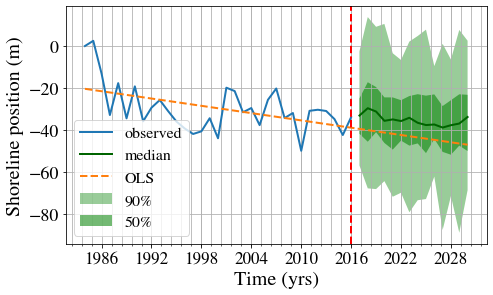

In [166]:
# get next forecast in dataset
ts_, fcst_ = get_next_forecast(ts_it, forecast_it)

fig, ax = plt.subplots()
plot_prob_forecast(ts_, fcst_['SimpleFeedForwardEstimator-618'], ax, forecast_mode='forecast', show_ols=True)

### Plot forecast of all predictors

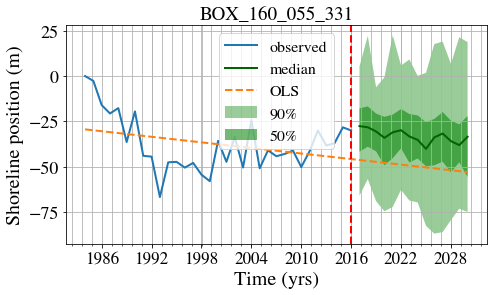

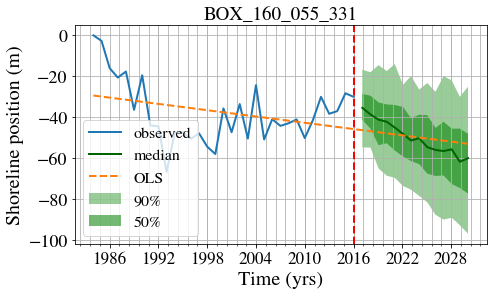

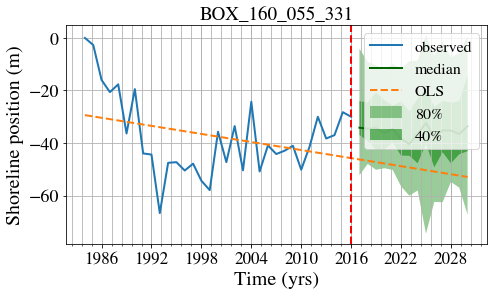

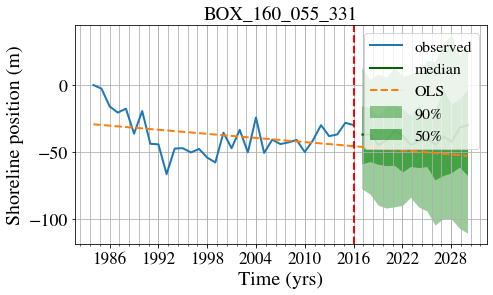

In [173]:
ts, forecasts = get_next_forecast(ts_it, forecast_it)

for k, v in forecasts.items():
    fig, ax = plt.subplots()
    plot_prob_forecast(ts, v, ax, plt_type='forecast', show_ols=True)
    transect_id = v.item_id
    ax.set_title(transect_id)

### Update forecast plotting function 

In [266]:
import matplotlib.dates as mdates
import folium
import webbrowser
from scipy import stats

y = lambda intercept, slope, x: intercept + slope * x

def ols(obs, forecast_horizon=None):
    x = range(len(obs))
    slope, intercept, _, _, _ = stats.linregress(x, obs)
    if forecast_horizon is not None:
        x = range(len(obs) + forecast_horizon)
    return [y(intercept, slope, x) for x in x]

qbounds = {
    "all_q": [0.05, 0.25, 0.75, 0.95],
    "limited_q": [0.1, 0.3, 0.7, 0.9]
}


def plot_prob_forecast(ts, fcst, ax, plt_type='eval', show_ols=False, set_ylabel=True, ylim=None):
    start = ts['start']
    # handle ts input when forecasting
    if isinstance(ts, dict):
        ts = pd.Series(
            ts['target'],
            index=pd.date_range(
                start=ts['start'],
                periods=len(ts['target']),
                freq='AS-JAN'
            )
        )
    
    ax.plot(ts.index, ts.values, label='observed')
    ax.plot(fcst.index, fcst.median, label='median', color='darkgreen')
    
    if show_ols is True:
        ols_series = pd.Series(
            ols(ts.values, forecast_horizon=len(fcst.index)),
            index=pd.date_range(
                start=start,
                periods=len(ts.index)+len(fcst.index),
                freq='AS-JAN'
            )
        )
        ax.plot(ols_series.index, ols_series.values, label='OLS', linestyle='--')
    
    if np.isnan(fcst.quantile(0.95)).all():
        quantiles = qbounds['limited_q']
    else:
        quantiles = qbounds['all_q']
    
    
    ax.fill_between(
        fcst.index, 
        fcst.quantile(quantiles[0]), 
        fcst.quantile(quantiles[-1]), 
        facecolor='green',
        alpha=0.4,
        label=f'{int(np.round(quantiles[-1]-quantiles[0], 2)*100)}%'
    )
    
    
    ax.fill_between(
        fcst.index, 
        fcst.quantile(quantiles[1]), 
        fcst.quantile(quantiles[-2]), 
        facecolor='green',
        alpha=0.55,
        label=f'{int(np.round(quantiles[-2]-quantiles[1], 2)*100)}%'    
    )
    
    axvline_idx = {
        "eval": ts.index[-(len(fcst.median)+1)],
        "forecast": ts.index[-1]
    }

    ax.axvline(
#         x=ts.index[-(len(fcst.median)+1)],
        x=axvline_idx[plt_type],
        color='red', 
        linestyle='--'
    )

    ax.xaxis.set_minor_locator(
        AutoMinorLocator(5)
    )
    ax.xaxis.set_major_locator(
        mdates.YearLocator(base=6)
    )
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%Y')
    )

    if ylim is not None:
        ax.set_ylim(ylim)
    
    if set_ylabel is False:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Shoreline position (m)')
    ax.set_xlabel('Time (yrs)')
    ax.grid(which="both")
    ax.legend(loc="best")

In [161]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=True,
    sample=None,
    get_transects = ['BOX_160_055_348']
)

ts_it, forecast_it = get_forecast_it(test_ds, predictors)
ts, forecasts = get_next_forecast(ts_it, forecast_it)

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

#### DeepAR Forecast
plot_prob_forecast(
    ts,
    forecasts['DeepAREstimator-619'], 
    axes[0],
    plt_type='forecast',
    show_ols=True,
)
plt.legend(loc='upper left')


#### MQCNN Forecast
plot_prob_forecast(
    ts,
    forecasts['MQCNNEstimator-620'], 
    axes[1],
    plt_type='forecast',
    show_ols=True,
    set_ylabel=False, 
    ylim=[-15, 102]
)
plt.legend(loc='upper left')

for i, ax in enumerate(axes.flat): 
    ax.text(0.96, 0.03, string.ascii_lowercase[i], transform=ax.transAxes, weight='bold')

# plt.savefig(os.path.join(report_dir, 'images/forecast-example.pdf'), dpi=300)

TypeError: get_forecast_it() missing 2 required positional arguments: 'predictors' and 'forecast_mode'

RepresentableBlockPredictor


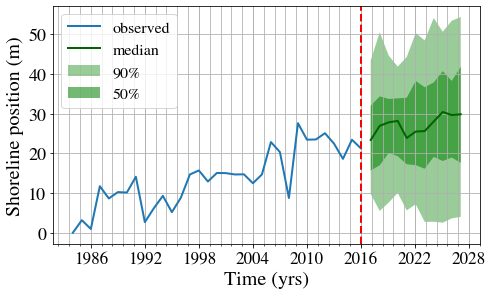

RepresentableBlockPredictor


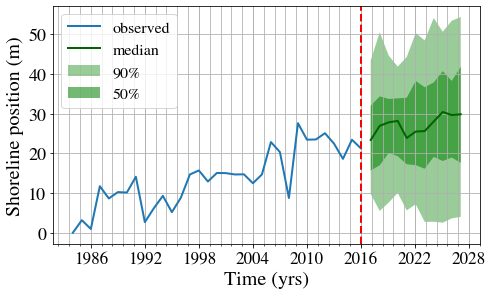

RepresentableBlockPredictor


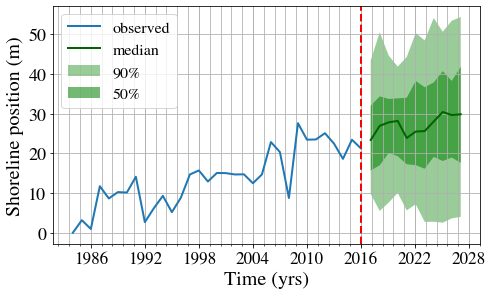

RepresentableBlockPredictor


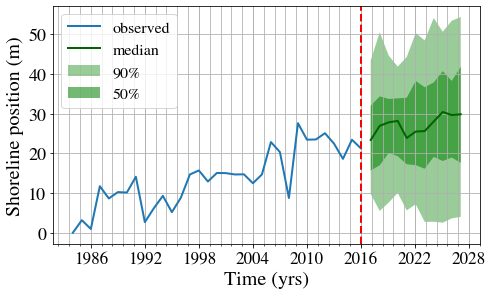

In [738]:
ts, fcst = next(ts_it), next(fcst_it)
for predictor in predictors.values():
    
    
    
    
    
    ts_it, fcst_it = forecast(entry, predictor)
    fig, ax = plt.subplots()
    plot_prob_forecast(ts, fcst, ax, plt_type='forecast')
    plt.show()

In [242]:
pd.read_csv(os.path.join(data_dir, 'robustness-final.csv'))[['predictor', 'method_name', 'processing_time']]

predictor method_name  processing_time
0  SimpleFeedForwardEstimator         NaN        92.941660
1             DeepAREstimator         NaN      1978.062001
2              MQCNNEstimator         NaN        86.763150
3          DeepStateEstimator         NaN      1506.384722
4                  SimpleLSTM         NaN      3425.871678
5                  linregress         NaN        20.879025
6          RForecastPredictor       arima      7568.048168

BOX_096_001_2


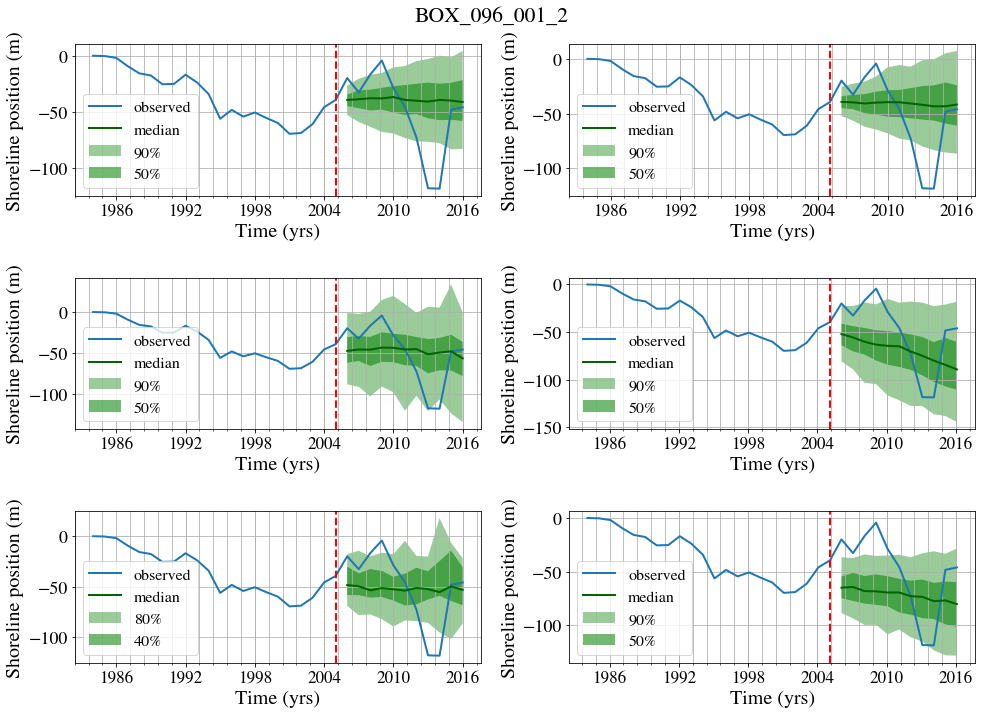

In [703]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
fig.subplots_adjust(top=0.8)

for axs, data in zip(axes.flatten(), list(predictor_its.values())):
    ts, fcst = next(data[1]), next(data[0])
    plot_prob_forecast(ts, fcst, axs)
plt.suptitle(f"{fcst.item_id}", y=1)

# to map
add_to_map(m, [fcst.item_id])
m.save(output_file)
print(fcst.item_id)


In [ ]:
def get_predictor_its(test_ds):
    
    its = dict()
    
    its["arima"] = make_evaluation_predictions(
        test_ds, predictor=get_rforecast_predictor("arima"), num_samples=300
    )

    its["ets"] = make_evaluation_predictions(
        test_ds, predictor=get_rforecast_predictor("ets"), num_samples=300
    )

    its["simpleffn"] = make_evaluation_predictions(
        test_ds, predictor=simpleffn, num_samples=300
    )

    its["deepar"] = make_evaluation_predictions(
        test_ds, predictor=deepar, num_samples=300
    )

    its["mqcnn"] = make_evaluation_predictions(
        test_ds, predictor=mqcnn, num_samples=300
    )

    its["deepssm"] = make_evaluation_predictions(
        test_ds, predictor=deepssm, num_samples=300
    )
    return its

predictor_its = get_predictor_its(test_ds)